In [89]:
# !pip install seaborn


In [90]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats
import itertools


# Import data
- all thresholds: df_both_sessions

In [91]:
df_both_sessions = pd.read_csv('tidy_both_sessions_thresholds_short_staircase.csv')

In [92]:
num_thresholds_per_subj = 18
assert df_both_sessions["prolificID"].nunique() == len(df_both_sessions) / num_thresholds_per_subj, 'Fatal: Number of thresholds per subject does not match'

print(f'\nNumber of participants with both sessions: {df_both_sessions["prolificID"].nunique()}')


Number of participants with both sessions: 169


In [93]:
# Update meridian values for reading tasks
df_both_sessions.loc[
    (df_both_sessions['taskName'] == 'reading') & 
    (df_both_sessions['meridian'].isin(['Beaver', 'Desert'])),
    'meridian'
] = 'first'

df_both_sessions.loc[
    (df_both_sessions['taskName'] == 'reading') & 
    (df_both_sessions['meridian'].isin(['Winter', 'Islands'])),
    'meridian'
] = 'second'

# Data cleaning

## Filter participants based on the quality of individual thresholds
Exclude participants with:
- acuity and crowding: numTrialsSent < 35, questSD > 0.1
- rsvp: numTrialsSent < 24, questSD > 0.1
- ordinary reading: accuracy < 60

Outputs: prolificID of participants excluded based on each criteria. 
- {taskName}_low_trial_ids
- {taskName}_large_questSD_ids
- reading_low_accuracy_ids

In [94]:
num_trials_required = 23  # 23 trials for short staircase
# num_trials_required = 35  # 35 trials for original staircase

acuity_low_trial_ids = (
    df_both_sessions.loc[
        df_both_sessions["taskName"].isin(["acuity"]) & (df_both_sessions["numTrialsSent"] < num_trials_required),
        "prolificID"
    ]
    .unique()
)
print(f'Number of participants with at least 1 threshold with number of trials < {num_trials_required}: {len(acuity_low_trial_ids)}')

acuity_large_questSD_ids = (
	df_both_sessions.loc[
        df_both_sessions["taskName"].isin(["acuity"]) & (df_both_sessions["questSD"] > 0.1),
        "prolificID"
	]
    .unique()
)
print(f'Number of participants with at least 1 threshold with questSD > 0.1: {len(acuity_large_questSD_ids)}')


Number of participants with at least 1 threshold with number of trials < 23: 7
Number of participants with at least 1 threshold with questSD > 0.1: 3


In [95]:
num_trials_required = 23  # 23 trials for short staircase
# num_trials_required = 35  # 35 trials for original staircase

crowding_low_trial_ids = (
    df_both_sessions.loc[
        df_both_sessions["taskName"].isin(["crowding"]) & (df_both_sessions["numTrialsSent"] < num_trials_required),
        "prolificID"
    ]
    .unique()
)
print(f'Number of participants with at least 1 threshold with number of trials < {num_trials_required}: {len(crowding_low_trial_ids)}')

crowding_large_questSD_ids = (
    df_both_sessions.loc[
        df_both_sessions["taskName"].isin(["crowding"]) & (df_both_sessions["questSD"] > 0.1),
        "prolificID"
    ]
    .unique()
)
print(f'Number of participants with at least 1 threshold with questSD > 0.1: {len(crowding_large_questSD_ids)}')


Number of participants with at least 1 threshold with number of trials < 23: 6
Number of participants with at least 1 threshold with questSD > 0.1: 28


In [96]:
num_trials_required = 16  # 16 trials for short staircase
# num_trials_required = 24  # 24 trials for original staircase

rsvp_low_trial_ids = (
    df_both_sessions.loc[
        df_both_sessions["taskName"].isin(["rsvp"]) & (df_both_sessions["numTrialsSent"] < num_trials_required),
        "prolificID"
    ]
    .unique()
)
print(f'Number of participants with at least 1 threshold with number of trials < {num_trials_required}: {len(rsvp_low_trial_ids)}')

rsvp_large_questSD_ids = (
    df_both_sessions.loc[
        df_both_sessions["taskName"].isin(["rsvp"]) & (df_both_sessions["questSD"] > 0.1),
        "prolificID"
    ]
    .unique()
)
print(f'Number of participants with at least 1 threshold with questSD > 0.1: {len(rsvp_large_questSD_ids)}')


Number of participants with at least 1 threshold with number of trials < 16: 0
Number of participants with at least 1 threshold with questSD > 0.1: 11


In [97]:
reading_low_accuracy_ids = (
    df_both_sessions.loc[
        df_both_sessions["taskName"].isin(["reading"]) & (df_both_sessions["readingCQAccuracy"] < 60),
        "prolificID"
    ]
    .unique()
)
print(f'Number of participants with at least 1 measurement with accuracy < 60%: {len(reading_low_accuracy_ids)}')


Number of participants with at least 1 measurement with accuracy < 60%: 63


## Compute the geometric mean of thresholds
- within the same block (one threshold per block): df_gmean_block
- across blocks for each task (one threshold per task): df_gmean_task
- within the same meridian (one threshold per meridian): df_gmean_meridian

In [98]:
# Group by participant, task, and repeat
df_gmean_block = (
    df_both_sessions.groupby(["prolificID", "taskName", "repeat"], observed=True)
					.agg(gmean_threshold_block=("threshold", lambda x: stats.gmean(x.dropna())))
					.reset_index()
)
df_gmean_block

/var/folders/cw/__v4n9dd1cl59tk5n02vqjg5lj9bck/T/ipykernel_22290/34349758.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  .agg(gmean_threshold_block=("threshold", lambda x: stats.gmean(x.dropna())))


,prolificID,taskName,repeat,gmean_threshold_block
0,559ad287fdf99b219a612d22,acuity,1,0.451
1,559ad287fdf99b219a612d22,acuity,2,0.318
2,559ad287fdf99b219a612d22,crowding,1,7.263
3,559ad287fdf99b219a612d22,crowding,2,7.704
4,559ad287fdf99b219a612d22,crowding,3,9.897
...,...,...,...,...
1685,67fffee26ec983c07f3a2abd,crowding,4,1.553
1686,67fffee26ec983c07f3a2abd,reading,1,126.616
1687,67fffee26ec983c07f3a2abd,reading,2,190.457
1688,67fffee26ec983c07f3a2abd,rsvp,1,340.966


In [99]:
# Group by participant, task, and repeat
df_gmean_task = (
    df_both_sessions.groupby(["prolificID", "taskName"], observed=True)
					.agg(gmean_threshold_task=("threshold", lambda x: stats.gmean(x.dropna())))
					.reset_index()
)
df_gmean_task

,prolificID,taskName,gmean_threshold_task
0,559ad287fdf99b219a612d22,acuity,0.379
1,559ad287fdf99b219a612d22,crowding,9.203
2,559ad287fdf99b219a612d22,reading,189.996
3,559ad287fdf99b219a612d22,rsvp,382.974
4,55d51a6b8ce09000127d4821,acuity,0.253
...,...,...,...
671,67e461f383bb0fc948ffd5fd,rsvp,1520.902
672,67fffee26ec983c07f3a2abd,acuity,0.331
673,67fffee26ec983c07f3a2abd,crowding,2.268
674,67fffee26ec983c07f3a2abd,reading,155.290


In [100]:
# Group by participant, task, and repeat
df_gmean_meridian = (
    df_both_sessions.groupby(["prolificID", "taskName","meridian"], observed=True)
					.agg(gmean_threshold_meridian=("threshold", lambda x: stats.gmean(x.dropna())))
					.reset_index()
)
df_gmean_meridian

,prolificID,taskName,meridian,gmean_threshold_meridian
0,559ad287fdf99b219a612d22,acuity,L8,0.398
1,559ad287fdf99b219a612d22,acuity,R8,0.360
2,559ad287fdf99b219a612d22,crowding,L8,13.897
3,559ad287fdf99b219a612d22,crowding,R8,6.095
4,559ad287fdf99b219a612d22,reading,first,205.096
...,...,...,...,...
1178,67fffee26ec983c07f3a2abd,crowding,L8,3.149
1179,67fffee26ec983c07f3a2abd,crowding,R8,1.634
1180,67fffee26ec983c07f3a2abd,reading,first,189.065
1181,67fffee26ec983c07f3a2abd,reading,second,127.548


## Filter participants based on test-retest ratio
- log(test/retest), i.e., log(test) - log(retest), note: not the ratio of the logged thresholds; take the ratio between the numerical thresholds and then take the log.
- if test and retest are very different, then it means that the participant is unreliable and therefore should be excluded 

Outputs: prolificID of participants with large test-retest ratio
- {taskName}_bad_ratio_ids

### Functions:

In [101]:
def compute_test_retest_ratio(df, block1_colname, block2_colname):
	'''
	Compute test-retest ratio: log10(block2 / block1)
	'''
	return np.log10(df[block2_colname] / df[block1_colname])

def flag_outliers_IQR(
    df,
    col_prefix="log_ratio_",
    criterion_k=1.5,
    verbose=True,
):
    """
    Add boolean outlier flags to ratio columns in a pivot table.

    - Detects columns via `col_prefix`.
    - For each ratio col: computes Q1, Q3, IQR; flags values < Q1 - k*IQR or > Q3 + k*IQR.
    - Writes a boolean flag column '<ratio_col>_is_outlier'.
    Returns a new DataFrame (does not modify input).
    """
    df = df.copy()

    # Identify ratio columns
    colNames = [c for c in df.columns if c.startswith(col_prefix)]

    for col in colNames:
        # Compute IQR bounds (NaNs ignored by quantile)
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - criterion_k * iqr
        upper = q3 + criterion_k * iqr

        mask = (df[col] < lower) | (df[col] > upper)
        out_col = f"{col}_is_outlier"
        df[out_col] = mask.fillna(False)

        if verbose:
            n = int(mask.sum())
            print(f"{col}: Q1={q1:.4f}, Q3={q3:.4f}, IQR={iqr:.4f}, "
                  f"bounds=({lower:.4f}, {upper:.4f}), outliers={n}")

    return df


def exclusion_ids_from_flags(
    df_wide: pd.DataFrame,
    task: str,
    flag_cols=None,                 # e.g., ["log_ratio_2vs1_is_outlier"] or None → auto-pick all *_is_outlier
    require="any",                  # "any" = exclude if ANY flag True; "all" = exclude only if ALL flags True
):
    """
    Return a list of prolificID to exclude for a given task, based on boolean outlier flags.
    df_wide must include columns: 'prolificID', 'taskName', and *_is_outlier booleans.
    """
    d = df_wide[df_wide["taskName"] == task]

    if flag_cols is None:
        flag_cols = [c for c in d.columns if c.endswith("_is_outlier")]

    if not flag_cols:
        return []  # nothing to check

    if require == "any":
        bad = d.groupby("prolificID")[flag_cols].any().any(axis=1)
    elif require == "all":
        bad = d.groupby("prolificID")[flag_cols].all().all(axis=1)
    else:
        raise ValueError("Invalid require value. Use 'any' or 'all'.")
    return bad[bad].index.tolist()

def filter_excluding_ids(df_wide: pd.DataFrame, *exclude_lists):
    """
    Return df_wide with rows whose prolificID is NOT in any of the exclude lists.
    Accepts multiple lists/sets of IDs.
    """
    # Merge all input lists/sets into one set
    exclude_ids = set().union(*exclude_lists)
    return df_wide[~df_wide["prolificID"].isin(exclude_ids)].copy()

def filter_including_ids(df_wide: pd.DataFrame, *include_lists):
    """
    Return df_wide with rows whose prolificID IS IN any of the exclude lists.
    Accepts multiple lists/sets of IDs.
    """
    # Merge all input lists/sets into one set
    include_ids = set().union(*include_lists)
    return df_wide[df_wide["prolificID"].isin(include_ids)].copy()


In [102]:
def plot_ratio(data_array, title, num_bins=80, min_val=-2.5, max_val=2.5, abs_bool=False): # , num_bins=20, min_val=0.08, max_val=1.11
    '''
    Input:
    - data_array: an array of test-retest ratios
    - title: [string] title and x-axis label of the figure
    '''
    
    # make the bins look the same size on a log scale
    # min_val = round(np.nanmin(data_array),2)
    # max_val = round(np.nanmax(data_array),2)
    # print(f'Min and max bin limits: {min_val}, {max_val}')
    bins = np.linspace(min_val, max_val, num_bins + 1)
    if abs_bool:
        data_array = np.abs(data_array)
        title = 'Absolute ' + title
                
    plt.figure(figsize=(8, 2)) 
    plt.hist(data_array, bins=bins, color='lightyellow', edgecolor='black')# bins=bins
    plt.title(f"{title} (n = {np.count_nonzero(~np.isnan(data_array))})", fontsize = 16)
    plt.xlabel(title, fontsize = 14)
    plt.ylabel("Frequency", fontsize = 14)
    plt.xlim(min_val, max_val)
    # plt.ylim(0,100)
    # add ticks and format them as normal floats
    # tick_positions = np.linspace(0.1, 1, num=10)  
    # plt.xticks(tick_positions, labels=[f"{x:.1f}" for x in tick_positions])

    
    plt.show()

### Compute ratios:

In [103]:
df_gmean_block_wide = (df_gmean_block
        .pivot(index=["prolificID", "taskName"],
               columns="repeat",
               values="gmean_threshold_block")
        .rename(columns={1: "block1", 2: "block2", 3: "block3", 4: "block4"})
        .reset_index())

df_gmean_block_wide

repeat,prolificID,taskName,block1,block2,block3,block4
0,559ad287fdf99b219a612d22,acuity,0.451,0.318,NaN,NaN
1,559ad287fdf99b219a612d22,crowding,7.263,7.704,9.897,12.953
2,559ad287fdf99b219a612d22,reading,210.135,171.787,NaN,NaN
3,559ad287fdf99b219a612d22,rsvp,308.722,475.083,NaN,NaN
4,55d51a6b8ce09000127d4821,acuity,0.278,0.230,NaN,NaN
...,...,...,...,...,...,...
671,67e461f383bb0fc948ffd5fd,rsvp,1456.221,1588.455,NaN,NaN
672,67fffee26ec983c07f3a2abd,acuity,0.403,0.272,NaN,NaN
673,67fffee26ec983c07f3a2abd,crowding,3.684,4.388,1.055,1.553
674,67fffee26ec983c07f3a2abd,reading,126.616,190.457,NaN,NaN


In [104]:
df_gmean_block_wide['log_ratio_2vs1'] = compute_test_retest_ratio(df_gmean_block_wide, 'block1', 'block2')
df_gmean_block_wide['log_ratio_3vs1'] = compute_test_retest_ratio(df_gmean_block_wide, 'block1', 'block3')
df_gmean_block_wide['log_ratio_4vs1'] = compute_test_retest_ratio(df_gmean_block_wide, 'block1', 'block4')
df_gmean_block_wide['log_ratio_3vs2'] = compute_test_retest_ratio(df_gmean_block_wide, 'block2', 'block3')
df_gmean_block_wide['log_ratio_4vs2'] = compute_test_retest_ratio(df_gmean_block_wide, 'block2', 'block4')
df_gmean_block_wide['log_ratio_4vs3'] = compute_test_retest_ratio(df_gmean_block_wide, 'block3', 'block4')

In [105]:
display(df_gmean_block_wide.head())

repeat,prolificID,taskName,block1,block2,block3,block4,log_ratio_2vs1,log_ratio_3vs1,log_ratio_4vs1,log_ratio_3vs2,log_ratio_4vs2,log_ratio_4vs3
0,559ad287fdf99b219a612d22,acuity,0.451,0.318,NaN,NaN,-0.152,NaN,NaN,NaN,NaN,NaN
1,559ad287fdf99b219a612d22,crowding,7.263,7.704,9.897,12.953,0.026,0.134,0.251,0.109,0.226,0.117
2,559ad287fdf99b219a612d22,reading,210.135,171.787,NaN,NaN,-0.088,NaN,NaN,NaN,NaN,NaN
3,559ad287fdf99b219a612d22,rsvp,308.722,475.083,NaN,NaN,0.187,NaN,NaN,NaN,NaN,NaN
4,55d51a6b8ce09000127d4821,acuity,0.278,0.230,NaN,NaN,-0.082,NaN,NaN,NaN,NaN,NaN


### Plot ratios before filtering

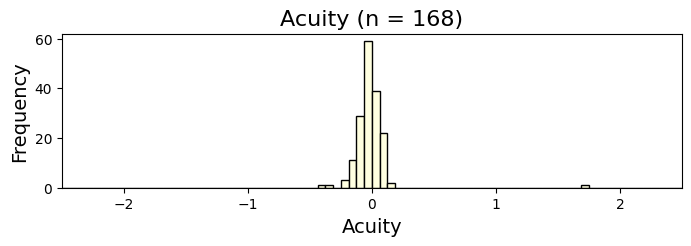

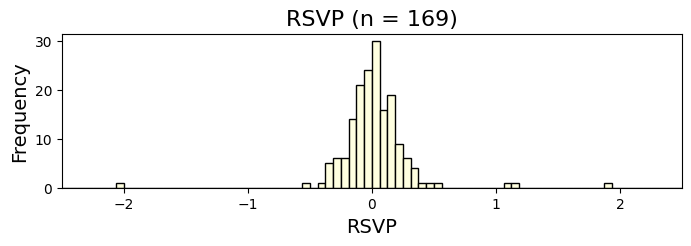

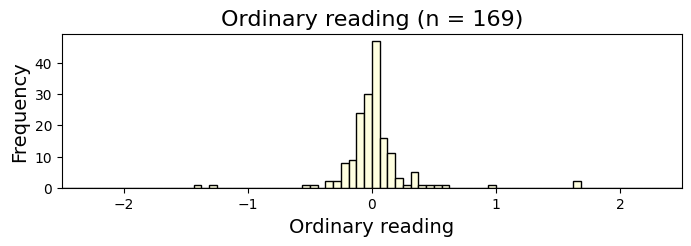

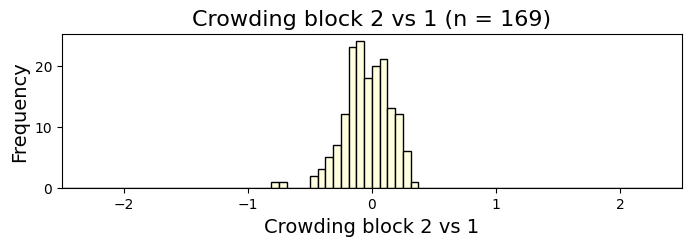

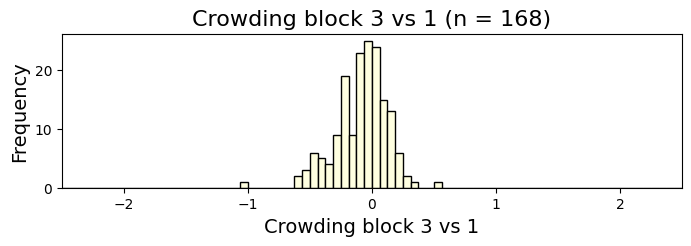

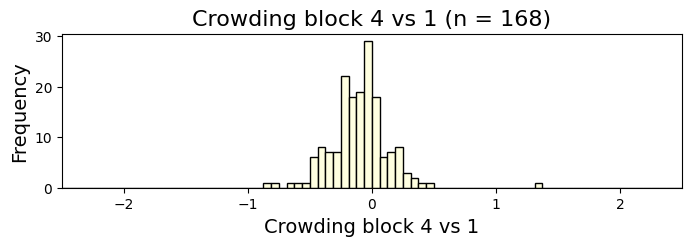

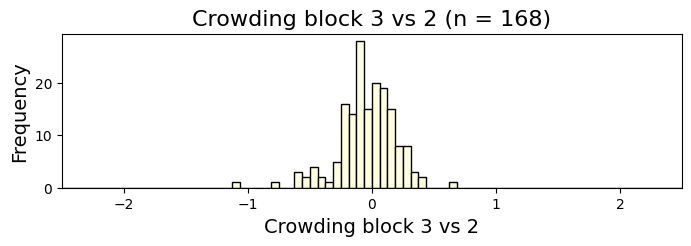

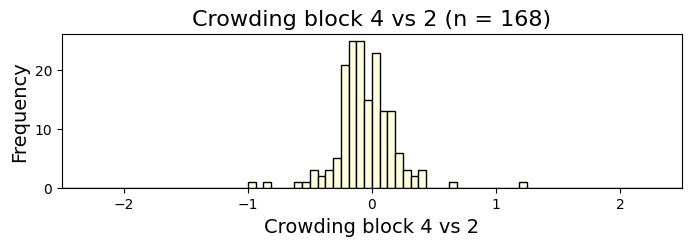

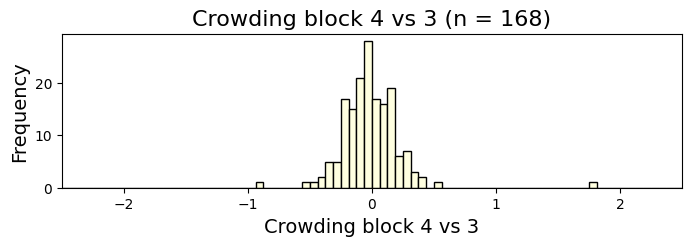

In [106]:
plot_ratio(df_gmean_block_wide[df_gmean_block_wide["taskName"] == "acuity"]['log_ratio_2vs1'], 'Acuity')
plot_ratio(df_gmean_block_wide[df_gmean_block_wide["taskName"] == "rsvp"]['log_ratio_2vs1'], 'RSVP')
plot_ratio(df_gmean_block_wide[df_gmean_block_wide["taskName"] == "reading"]['log_ratio_2vs1'], 'Ordinary reading')

plot_ratio(df_gmean_block_wide[df_gmean_block_wide["taskName"] == "crowding"]['log_ratio_2vs1'], 'Crowding block 2 vs 1')
plot_ratio(df_gmean_block_wide[df_gmean_block_wide["taskName"] == "crowding"]['log_ratio_3vs1'], 'Crowding block 3 vs 1')
plot_ratio(df_gmean_block_wide[df_gmean_block_wide["taskName"] == "crowding"]['log_ratio_4vs1'], 'Crowding block 4 vs 1')
plot_ratio(df_gmean_block_wide[df_gmean_block_wide["taskName"] == "crowding"]['log_ratio_3vs2'], 'Crowding block 3 vs 2')
plot_ratio(df_gmean_block_wide[df_gmean_block_wide["taskName"] == "crowding"]['log_ratio_4vs2'], 'Crowding block 4 vs 2')
plot_ratio(df_gmean_block_wide[df_gmean_block_wide["taskName"] == "crowding"]['log_ratio_4vs3'], 'Crowding block 4 vs 3')


### Flag outliers

In [107]:
df_gmean_block_wide_flaggedOutliers = df_gmean_block_wide.copy()
df_gmean_block_wide_flaggedOutliers = flag_outliers_IQR(df_gmean_block_wide_flaggedOutliers)

log_ratio_2vs1: Q1=-0.0928, Q3=0.0670, IQR=0.1598, bounds=(-0.3325, 0.3067), outliers=46
log_ratio_3vs1: Q1=-0.1980, Q3=0.0439, IQR=0.2419, bounds=(-0.5609, 0.4068), outliers=4
log_ratio_4vs1: Q1=-0.2116, Q3=0.0119, IQR=0.2235, bounds=(-0.5469, 0.3472), outliers=9
log_ratio_3vs2: Q1=-0.1494, Q3=0.1070, IQR=0.2564, bounds=(-0.5340, 0.4915), outliers=6
log_ratio_4vs2: Q1=-0.1782, Q3=0.0613, IQR=0.2395, bounds=(-0.5374, 0.4204), outliers=6
log_ratio_4vs3: Q1=-0.1331, Q3=0.1140, IQR=0.2471, bounds=(-0.5037, 0.4846), outliers=4


In [108]:
display(df_gmean_block_wide_flaggedOutliers.head())

repeat,prolificID,taskName,block1,block2,block3,block4,log_ratio_2vs1,log_ratio_3vs1,log_ratio_4vs1,log_ratio_3vs2,log_ratio_4vs2,log_ratio_4vs3,log_ratio_2vs1_is_outlier,log_ratio_3vs1_is_outlier,log_ratio_4vs1_is_outlier,log_ratio_3vs2_is_outlier,log_ratio_4vs2_is_outlier,log_ratio_4vs3_is_outlier
0,559ad287fdf99b219a612d22,acuity,0.451,0.318,NaN,NaN,-0.152,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False
1,559ad287fdf99b219a612d22,crowding,7.263,7.704,9.897,12.953,0.026,0.134,0.251,0.109,0.226,0.117,False,False,False,False,False,False
2,559ad287fdf99b219a612d22,reading,210.135,171.787,NaN,NaN,-0.088,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,559ad287fdf99b219a612d22,rsvp,308.722,475.083,NaN,NaN,0.187,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False
4,55d51a6b8ce09000127d4821,acuity,0.278,0.230,NaN,NaN,-0.082,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False


### List participants filtered out by test-retest ratios

In [109]:
# exclude all participants with any outlier in any of the crowding ratios
acuity_bad_ratio_ids = exclusion_ids_from_flags(df_gmean_block_wide_flaggedOutliers, task='acuity', flag_cols=["log_ratio_2vs1_is_outlier"])
crowding_bad_ratio_ids = exclusion_ids_from_flags(df_gmean_block_wide_flaggedOutliers, task='crowding')
rsvp_bad_ratio_ids = exclusion_ids_from_flags(df_gmean_block_wide_flaggedOutliers, task='rsvp', flag_cols=["log_ratio_2vs1_is_outlier"])
reading_bad_ratio_ids = exclusion_ids_from_flags(df_gmean_block_wide_flaggedOutliers, task='reading', flag_cols=["log_ratio_2vs1_is_outlier"])

df_all_acuity = df_gmean_block_wide_flaggedOutliers[df_gmean_block_wide_flaggedOutliers["taskName"] == "acuity"]
df_filtered_acuity = filter_excluding_ids(df_all_acuity, acuity_bad_ratio_ids)

df_all_rsvp = df_gmean_block_wide_flaggedOutliers[df_gmean_block_wide_flaggedOutliers["taskName"] == "rsvp"]
df_filtered_rsvp = filter_excluding_ids(df_all_rsvp, rsvp_bad_ratio_ids)

df_all_reading = df_gmean_block_wide_flaggedOutliers[df_gmean_block_wide_flaggedOutliers["taskName"] == "reading"]
df_filtered_reading = filter_excluding_ids(df_all_reading, reading_bad_ratio_ids)

# Below are exclusiong ids for individual crowding ratios. Created for plotting ratios after exclusion.
crowding_exclude_ids = exclusion_ids_from_flags(df_gmean_block_wide_flaggedOutliers, task='crowding', flag_cols=["log_ratio_2vs1_is_outlier"])
df_all_crowding = df_gmean_block_wide_flaggedOutliers[df_gmean_block_wide_flaggedOutliers["taskName"] == "crowding"]
df_filtered_crowding21 = filter_excluding_ids(df_all_crowding, crowding_exclude_ids)

crowding_exclude_ids = exclusion_ids_from_flags(df_gmean_block_wide_flaggedOutliers, task='crowding', flag_cols=["log_ratio_3vs1_is_outlier"])
df_all_crowding = df_gmean_block_wide_flaggedOutliers[df_gmean_block_wide_flaggedOutliers["taskName"] == "crowding"]
df_filtered_crowding31 = filter_excluding_ids(df_all_crowding, crowding_exclude_ids)

crowding_exclude_ids = exclusion_ids_from_flags(df_gmean_block_wide_flaggedOutliers, task='crowding', flag_cols=["log_ratio_4vs1_is_outlier"])
df_all_crowding = df_gmean_block_wide_flaggedOutliers[df_gmean_block_wide_flaggedOutliers["taskName"] == "crowding"]
df_filtered_crowding41 = filter_excluding_ids(df_all_crowding, crowding_exclude_ids)

crowding_exclude_ids = exclusion_ids_from_flags(df_gmean_block_wide_flaggedOutliers, task='crowding', flag_cols=["log_ratio_3vs2_is_outlier"])
df_all_crowding = df_gmean_block_wide_flaggedOutliers[df_gmean_block_wide_flaggedOutliers["taskName"] == "crowding"]
df_filtered_crowding32 = filter_excluding_ids(df_all_crowding, crowding_exclude_ids)

crowding_exclude_ids = exclusion_ids_from_flags(df_gmean_block_wide_flaggedOutliers, task='crowding', flag_cols=["log_ratio_4vs2_is_outlier"])
df_all_crowding = df_gmean_block_wide_flaggedOutliers[df_gmean_block_wide_flaggedOutliers["taskName"] == "crowding"]
df_filtered_crowding42 = filter_excluding_ids(df_all_crowding, crowding_exclude_ids)

crowding_exclude_ids = exclusion_ids_from_flags(df_gmean_block_wide_flaggedOutliers, task='crowding', flag_cols=["log_ratio_4vs3_is_outlier"])
df_all_crowding = df_gmean_block_wide_flaggedOutliers[df_gmean_block_wide_flaggedOutliers["taskName"] == "crowding"]
df_filtered_crowding43 = filter_excluding_ids(df_all_crowding, crowding_exclude_ids)


### Plot ratios after filtering

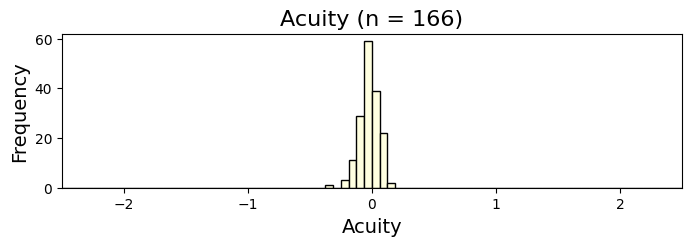

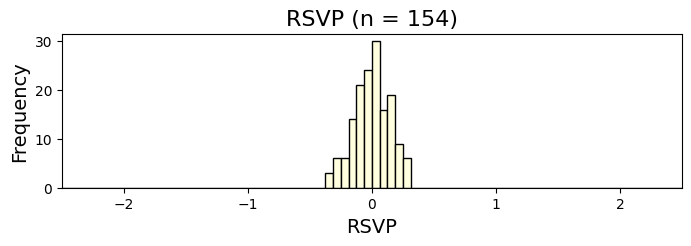

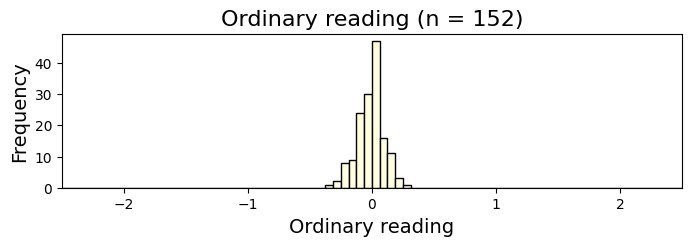

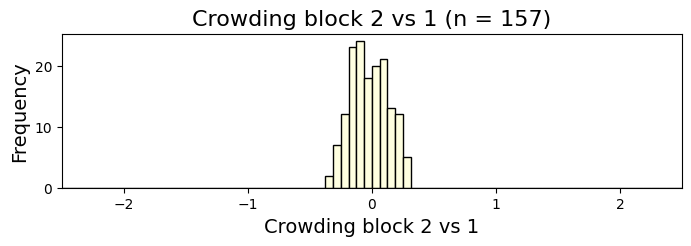

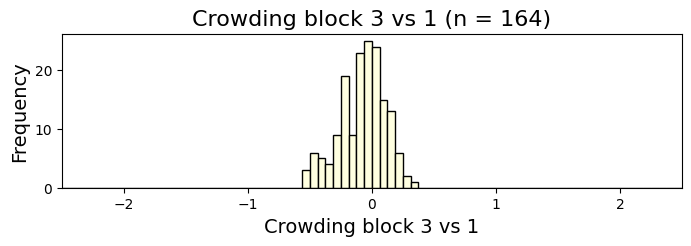

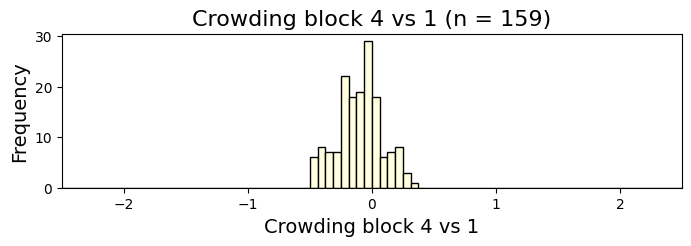

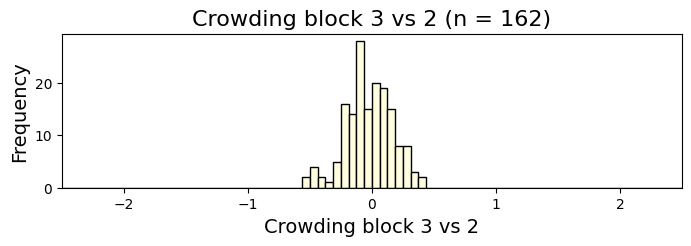

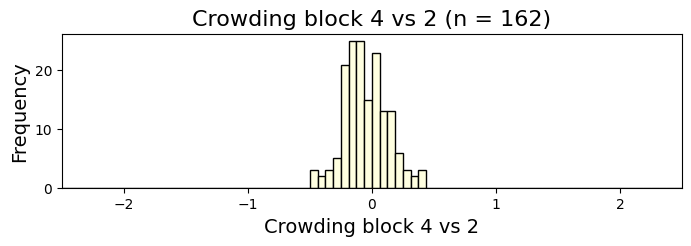

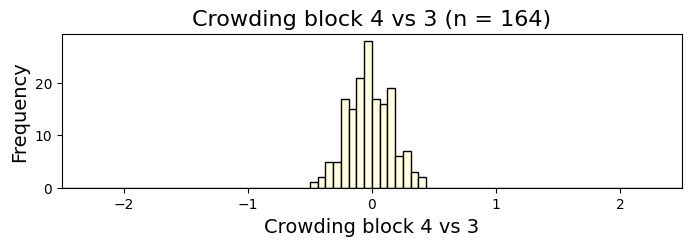

In [110]:
plot_ratio(df_filtered_acuity["log_ratio_2vs1"],title="Acuity")
plot_ratio(df_filtered_rsvp["log_ratio_2vs1"], title="RSVP")
plot_ratio(df_filtered_reading["log_ratio_2vs1"], title="Ordinary reading")

plot_ratio(df_filtered_crowding21["log_ratio_2vs1"], title="Crowding block 2 vs 1")
plot_ratio(df_filtered_crowding31["log_ratio_3vs1"], title="Crowding block 3 vs 1")
plot_ratio(df_filtered_crowding41["log_ratio_4vs1"], title="Crowding block 4 vs 1")
plot_ratio(df_filtered_crowding32["log_ratio_3vs2"], title="Crowding block 3 vs 2")
plot_ratio(df_filtered_crowding42["log_ratio_4vs2"], title="Crowding block 4 vs 2")
plot_ratio(df_filtered_crowding43["log_ratio_4vs3"], title="Crowding block 4 vs 3")

# Histograms of cleaned data

### Functions:

In [111]:
def plot_threshold_array(data_array, threshold_name, plot_log_scale=True, hist_color='skyblue', name_sd_bool=True,
                         num_bins=50, min_val=0.08, max_val=1.11, plot_JOV_patch=False):
    '''
    Input:
    - data_array: an array of data (could be output from extract_all_thresholds)
    - threshold_name: [string] title and x-axis label of the figure
    - plot_JOV_patch: [bool] plots mean +- 1 sd from crowding data (Kurzawski, Burchell et al., 2023, JOV) 
    '''
    
    # make the bins look the same size on a log scale
    # min_val = round(np.nanmin(data_array),2)
    # max_val = round(np.nanmax(data_array),2)
    # print(f'Min and max bin limits: {min_val}, {max_val}')
    
    std_data_array = np.nanstd(data_array)


    if plot_log_scale:
        bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins + 1)
    else:
        bins = np.linspace(min_val, max_val, num_bins + 1)
    
    plt.figure(figsize=(8, 2)) 

    if plot_JOV_patch:
        lowerBound = 0.18
        upperBound = 0.41
        plt.axvspan(lowerBound, upperBound, color='lightgray', alpha=0.5) # mean +- one std
    
    if name_sd_bool:
        plt.title(f"{threshold_name} (n = {np.count_nonzero(~np.isnan(data_array))}, sd = {round(std_data_array, 2)})", fontsize = 16)
    else:
        plt.title(f"{threshold_name} (n = {np.count_nonzero(~np.isnan(data_array))})", fontsize = 16)

    plt.hist(data_array, bins=bins, color=hist_color, edgecolor='black')# bins=bins
    plt.xlabel(threshold_name, fontsize = 14)
    plt.ylabel("Frequency", fontsize = 14)
    plt.xscale('log') if plot_log_scale else plt.xscale('linear')
    plt.yscale('log')
    plt.ylim(0.5, 200)

    # plt.xlim()
    # plt.ylim()
    # add ticks and format them as normal floats
    # tick_positions = np.logspace(np.log10(min_val), np.log10(max_val), num=10) if plot_log_scale else np.linspace(min_val, max_val, num=10)
    # plt.xticks(tick_positions, labels=[f"{x:.2f}" for x in tick_positions])

    
    plt.show()

In [112]:
def plot_hist_task(df, taskName, y_value,
                    low_trial_ids, large_questSD_ids, bad_ratio_ids, num_bins=50, min_val=0.08, max_val=1.11, bouma_bool=False):
    '''
    Plot histograms for raw data, low trial data, large questSD data, bad ratio data, and cleaned data for a given task.
    '''
    df_task_raw = df[df['taskName'] == taskName]
    df_low_trial = filter_including_ids(df_task_raw, low_trial_ids)
    df_large_questSD = filter_including_ids(df_task_raw, large_questSD_ids)
    df_bad_ratio = filter_including_ids(df_task_raw, bad_ratio_ids)
    df_cleaned = filter_excluding_ids(df_task_raw, low_trial_ids, large_questSD_ids, bad_ratio_ids)
    display(df_cleaned.head())

    raw_thresholds = df_task_raw[y_value]
    low_trial_thresholds = df_low_trial[y_value]
    large_questSD_thresholds = df_large_questSD[y_value]
    bad_ratio_thresholds = df_bad_ratio[y_value]
    cleaned_thresholds = df_cleaned[y_value]

    if bouma_bool:
        raw_thresholds = raw_thresholds / 8
        low_trial_thresholds = low_trial_thresholds / 8
        large_questSD_thresholds = large_questSD_thresholds / 8
        bad_ratio_thresholds = bad_ratio_thresholds / 8
        cleaned_thresholds = cleaned_thresholds / 8

    plot_threshold_array(raw_thresholds, f'{taskName} raw', num_bins=num_bins, min_val=min_val, max_val=max_val)
    plot_threshold_array(low_trial_thresholds, f'{taskName} low trials', num_bins=num_bins, min_val=min_val, max_val=max_val, hist_color='plum', name_sd_bool=False)
    plot_threshold_array(large_questSD_thresholds, f'{taskName} large questSD', num_bins=num_bins, min_val=min_val, max_val=max_val, hist_color='plum', name_sd_bool=False)
    plot_threshold_array(bad_ratio_thresholds, f'{taskName} bad test-retest ratio', num_bins=num_bins, min_val=min_val, max_val=max_val, hist_color='plum', name_sd_bool=False)
    plot_threshold_array(cleaned_thresholds, f'{taskName} cleaned', num_bins=num_bins, min_val=min_val, max_val=max_val)

### All individual thresholds:

,prolificID,conditionName,taskName,meridian,repeat,threshold,numTrialsSent,questSD,readingCQAccuracy
4,5f0788c06b220f03231666a0,acuity_R8_block1,acuity,R8,1,0.369,36.000,0.048,NaN
5,5f0788c06b220f03231666a0,acuity_L8_block1,acuity,L8,1,0.364,35.000,0.050,NaN
16,6778842e3f7e2e62756f7178,acuity_R8_block1,acuity,R8,1,0.523,35.000,0.050,NaN
17,6778842e3f7e2e62756f7178,acuity_L8_block1,acuity,L8,1,0.418,36.000,0.048,NaN
22,5e57d38b533eec1818078f0b,acuity_R8_block1,acuity,R8,1,0.297,36.000,0.050,NaN


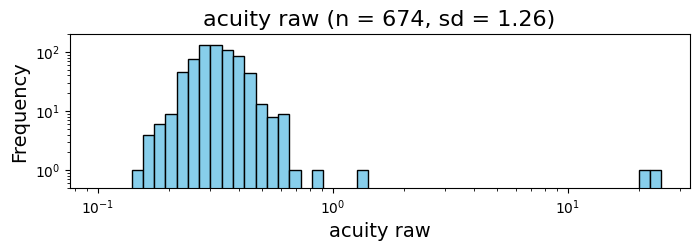

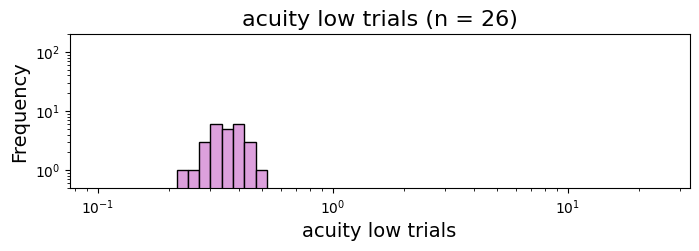

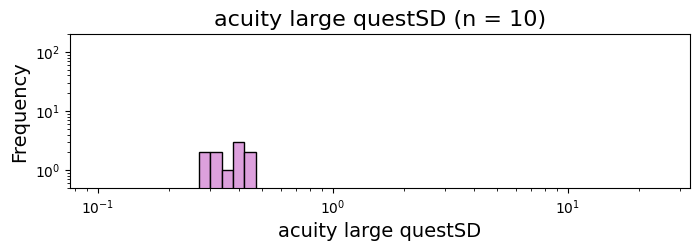

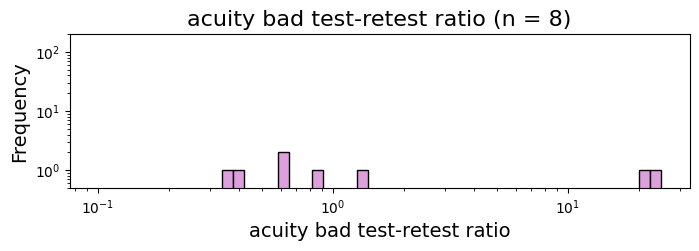

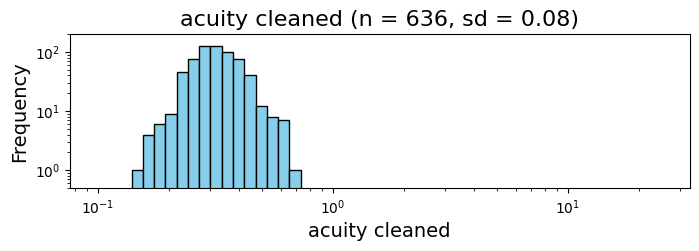

In [113]:
plot_hist_task(df_both_sessions, 'acuity', 'threshold',
                acuity_low_trial_ids, acuity_large_questSD_ids, acuity_bad_ratio_ids, 
                num_bins=50, min_val=0.1, max_val=25)

,prolificID,conditionName,taskName,meridian,repeat,threshold,numTrialsSent,questSD,readingCQAccuracy
0,5f0788c06b220f03231666a0,crowding_R8_block1,crowding,R8,1,1.360,36.000,0.066,NaN
1,5f0788c06b220f03231666a0,crowding_L8_block1,crowding,L8,1,1.625,36.000,0.050,NaN
2,5f0788c06b220f03231666a0,crowding_R8_block2,crowding,R8,2,0.679,36.000,0.051,NaN
3,5f0788c06b220f03231666a0,crowding_L8_block2,crowding,L8,2,2.310,37.000,0.059,NaN
12,6778842e3f7e2e62756f7178,crowding_R8_block1,crowding,R8,1,3.120,36.000,0.066,NaN


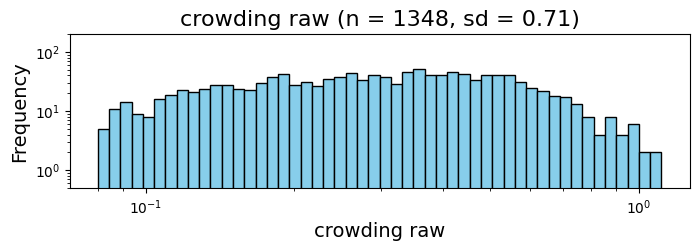

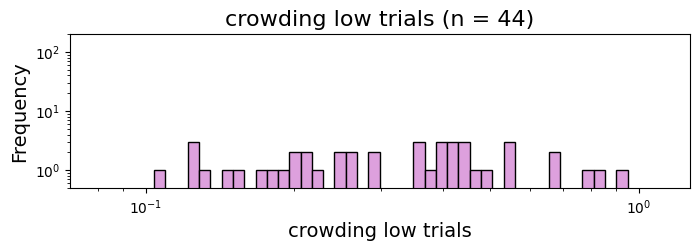

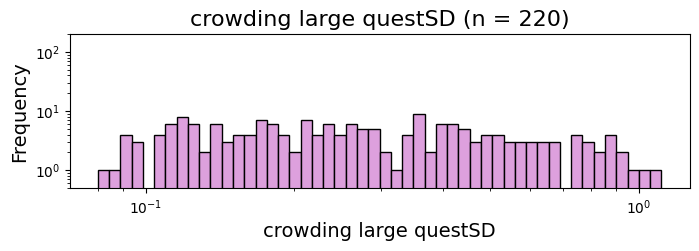

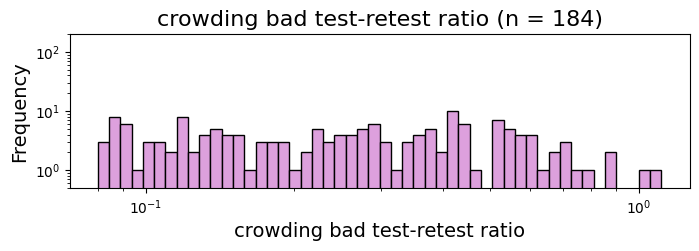

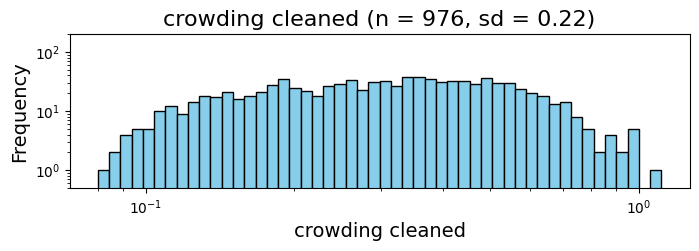

In [114]:
# crowding
plot_hist_task(df_both_sessions, 'crowding', 'threshold',
                crowding_low_trial_ids, crowding_large_questSD_ids, crowding_bad_ratio_ids, 
                bouma_bool=True)

,prolificID,conditionName,taskName,meridian,repeat,threshold,numTrialsSent,questSD,readingCQAccuracy
1014,5f0788c06b220f03231666a0,rsvp_foveal_block1,rsvp,foveal,1,1720.622,25.000,0.031,NaN
1015,64837ba51422d817b62cc5cc,rsvp_foveal_block1,rsvp,foveal,1,2318.773,25.000,0.031,NaN
1016,6778842e3f7e2e62756f7178,rsvp_foveal_block1,rsvp,foveal,1,2432.525,25.000,0.032,NaN
1017,5e57d38b533eec1818078f0b,rsvp_foveal_block1,rsvp,foveal,1,1455.706,25.000,0.032,NaN
1018,6501b789e3ddbc0a0b79b925,rsvp_foveal_block1,rsvp,foveal,1,2050.558,25.000,0.031,NaN


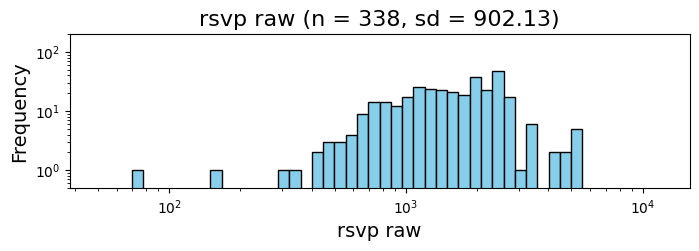

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/cw/__v4n9dd1cl59tk5n02vqjg5lj9bck/T/ipykernel_22290/3367854618.py:39: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


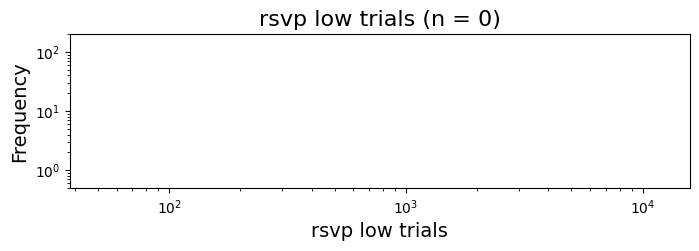

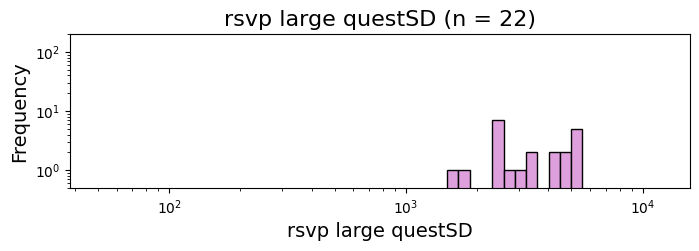

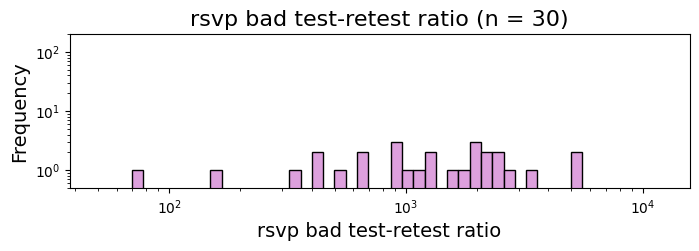

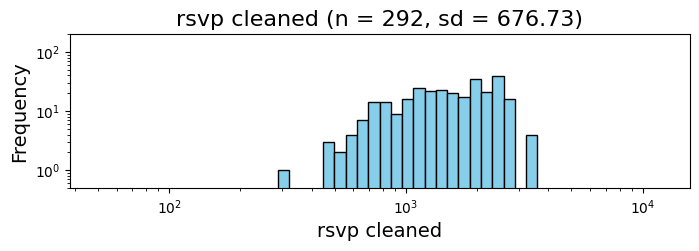

In [115]:
# rsvp
plot_hist_task(df_both_sessions, 'rsvp', 'threshold',
                rsvp_low_trial_ids, rsvp_large_questSD_ids, rsvp_bad_ratio_ids, 
                num_bins=50, min_val=50, max_val=12000)

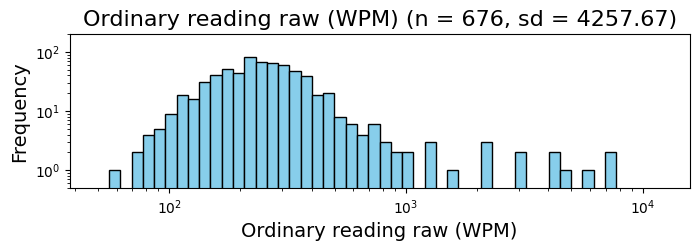

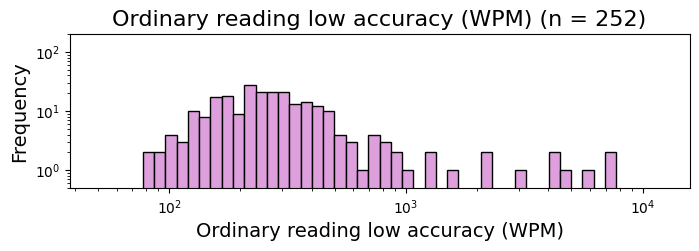

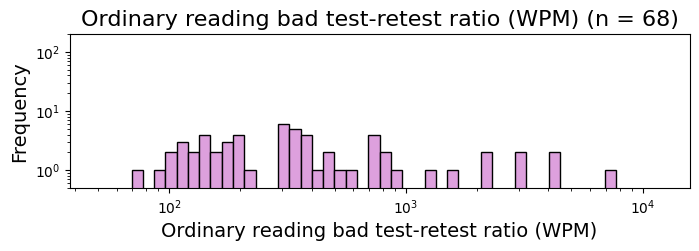

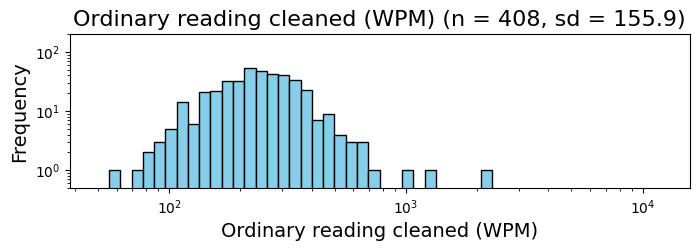

In [116]:
# ordinary reading
df_reading_allThresh_raw = df_both_sessions[df_both_sessions['taskName'] == 'reading']
df_reading_allThresh_low_trial = filter_including_ids(df_reading_allThresh_raw, reading_low_accuracy_ids)
df_reading_allThresh_bad_ratio = filter_including_ids(df_reading_allThresh_raw, reading_bad_ratio_ids)
df_reading_allThresh_cleaned = filter_excluding_ids(df_reading_allThresh_raw, reading_low_accuracy_ids, reading_bad_ratio_ids)

plot_threshold_array(df_reading_allThresh_raw['threshold'], 'Ordinary reading raw (WPM)', num_bins=50, min_val=50, max_val=12000)
plot_threshold_array(df_reading_allThresh_low_trial['threshold'], 'Ordinary reading low accuracy (WPM)', num_bins=50, min_val=50, max_val=12000, hist_color='plum', name_sd_bool=False)
plot_threshold_array(df_reading_allThresh_bad_ratio['threshold'], 'Ordinary reading bad test-retest ratio (WPM)', num_bins=50, min_val=50, max_val=12000, hist_color='plum', name_sd_bool=False)
plot_threshold_array(df_reading_allThresh_cleaned['threshold'], 'Ordinary reading cleaned (WPM)', num_bins=50, min_val=50, max_val=12000)

### Geomean for each block

,prolificID,taskName,repeat,gmean_threshold_block
0,559ad287fdf99b219a612d22,acuity,1,0.451
1,559ad287fdf99b219a612d22,acuity,2,0.318
10,55d51a6b8ce09000127d4821,acuity,1,0.278
11,55d51a6b8ce09000127d4821,acuity,2,0.230
20,5685850c333cbd000d4e042f,acuity,1,0.356


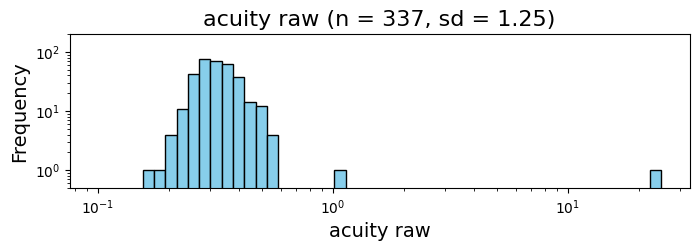

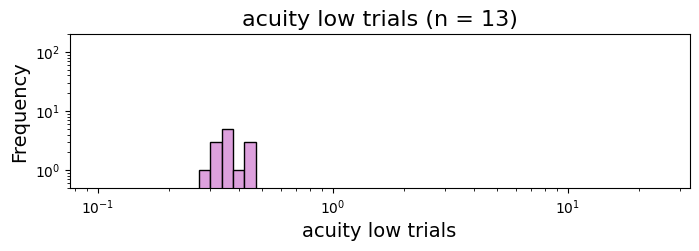

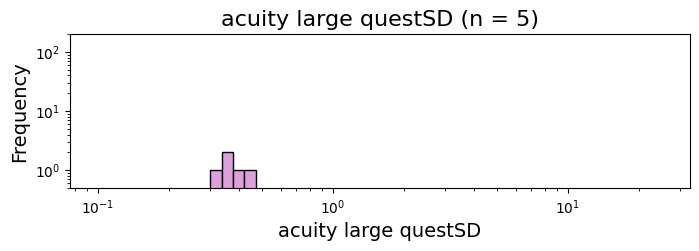

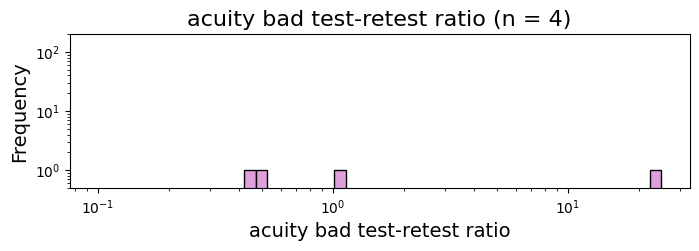

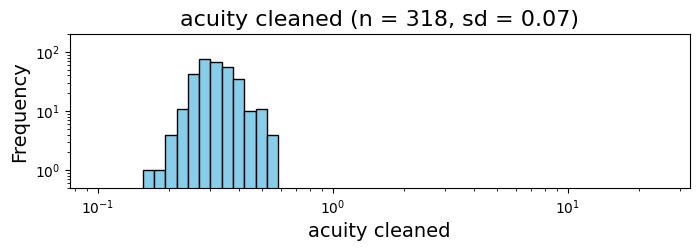

In [117]:
plot_hist_task(df_gmean_block, 'acuity', 'gmean_threshold_block',
                acuity_low_trial_ids, acuity_large_questSD_ids, acuity_bad_ratio_ids, 
                num_bins=50, min_val=0.1, max_val=25)

,prolificID,taskName,repeat,gmean_threshold_block
2,559ad287fdf99b219a612d22,crowding,1,7.263
3,559ad287fdf99b219a612d22,crowding,2,7.704
4,559ad287fdf99b219a612d22,crowding,3,9.897
5,559ad287fdf99b219a612d22,crowding,4,12.953
12,55d51a6b8ce09000127d4821,crowding,1,1.453


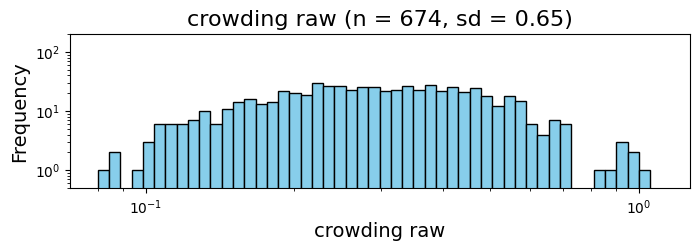

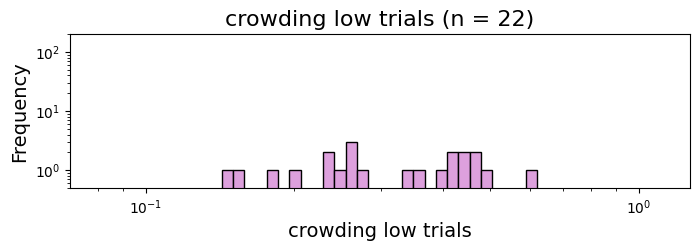

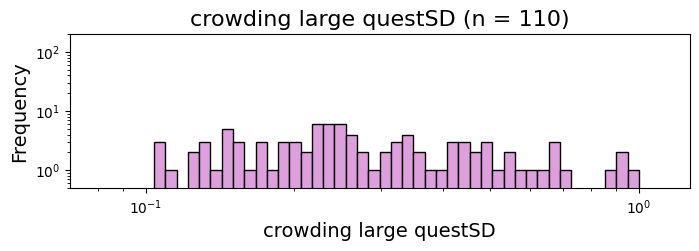

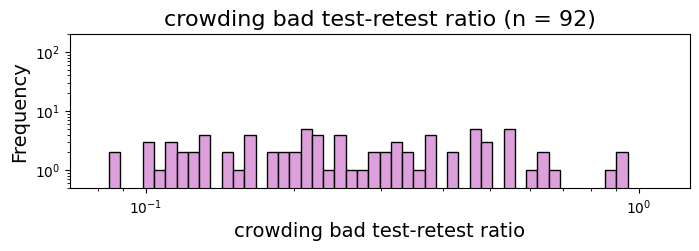

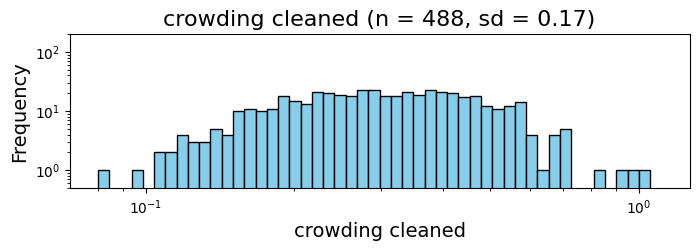

In [118]:
# crowding
plot_hist_task(df_gmean_block, 'crowding', 'gmean_threshold_block',
                crowding_low_trial_ids, crowding_large_questSD_ids, crowding_bad_ratio_ids, 
                bouma_bool=True)

,prolificID,taskName,repeat,gmean_threshold_block
8,559ad287fdf99b219a612d22,rsvp,1,308.722
9,559ad287fdf99b219a612d22,rsvp,2,475.083
28,5685850c333cbd000d4e042f,rsvp,1,1727.999
29,5685850c333cbd000d4e042f,rsvp,2,1968.722
38,56b78f11e77ebe000cbefe79,rsvp,1,1111.310


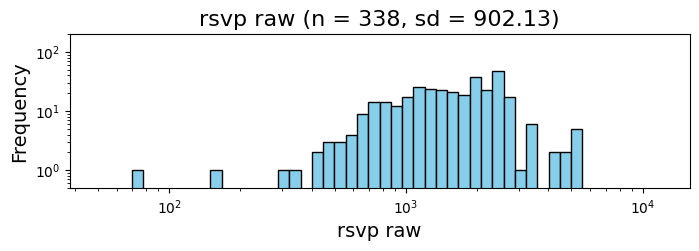

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/cw/__v4n9dd1cl59tk5n02vqjg5lj9bck/T/ipykernel_22290/3367854618.py:39: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


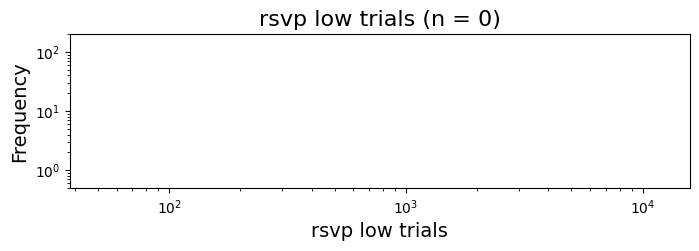

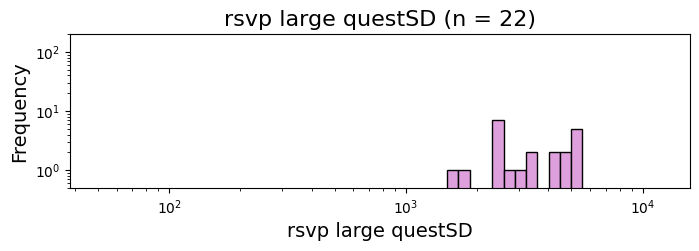

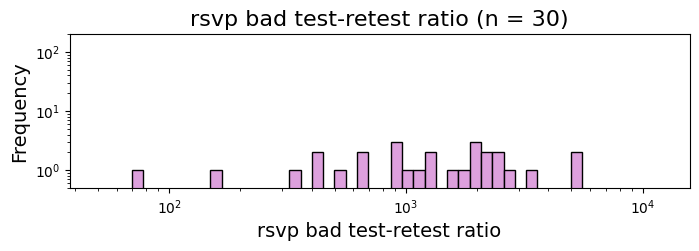

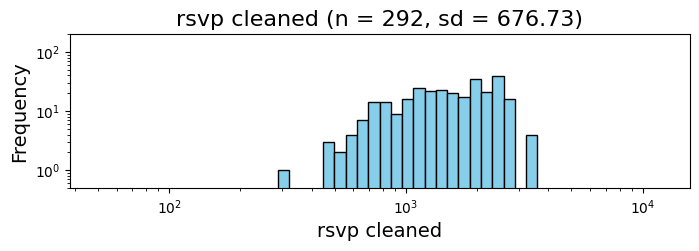

In [119]:
# rsvp
plot_hist_task(df_gmean_block, 'rsvp', 'gmean_threshold_block', 
                rsvp_low_trial_ids, rsvp_large_questSD_ids, rsvp_bad_ratio_ids, 
                num_bins=50, min_val=50, max_val=12000)

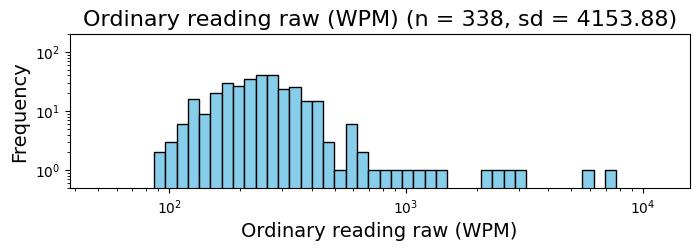

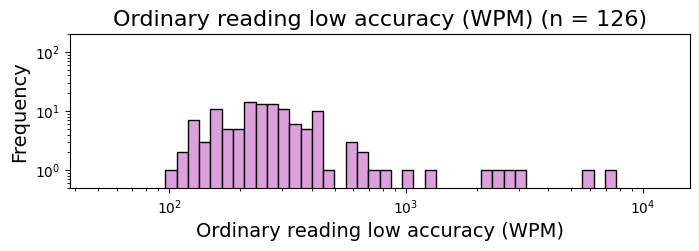

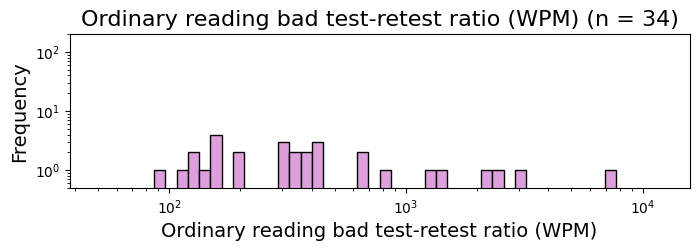

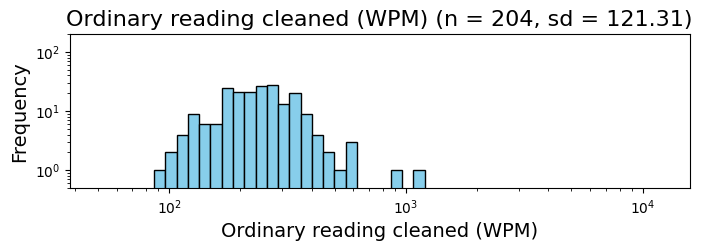

In [120]:
# ordinary reading
df_reading_gmean_block_raw = df_gmean_block[df_gmean_block['taskName'] == 'reading']
df_reading_gmean_block_low_trial = filter_including_ids(df_reading_gmean_block_raw, reading_low_accuracy_ids)
df_reading_gmean_block_bad_ratio = filter_including_ids(df_reading_gmean_block_raw, reading_bad_ratio_ids)
df_reading_gmean_block_cleaned = filter_excluding_ids(df_reading_gmean_block_raw, reading_low_accuracy_ids, reading_bad_ratio_ids)

plot_threshold_array(df_reading_gmean_block_raw['gmean_threshold_block'], 'Ordinary reading raw (WPM)', num_bins=50, min_val=50, max_val=12000)
plot_threshold_array(df_reading_gmean_block_low_trial['gmean_threshold_block'], 'Ordinary reading low accuracy (WPM)', num_bins=50, min_val=50, max_val=12000, hist_color='plum', name_sd_bool=False)
plot_threshold_array(df_reading_gmean_block_bad_ratio['gmean_threshold_block'], 'Ordinary reading bad test-retest ratio (WPM)', num_bins=50, min_val=50, max_val=12000, hist_color='plum', name_sd_bool=False)
plot_threshold_array(df_reading_gmean_block_cleaned['gmean_threshold_block'], 'Ordinary reading cleaned (WPM)', num_bins=50, min_val=50, max_val=12000)

### Geomean for each task:

,prolificID,taskName,gmean_threshold_task
0,559ad287fdf99b219a612d22,acuity,0.379
4,55d51a6b8ce09000127d4821,acuity,0.253
8,5685850c333cbd000d4e042f,acuity,0.292
12,56b78f11e77ebe000cbefe79,acuity,0.379
16,57334d427d01ed00098e8e69,acuity,0.300


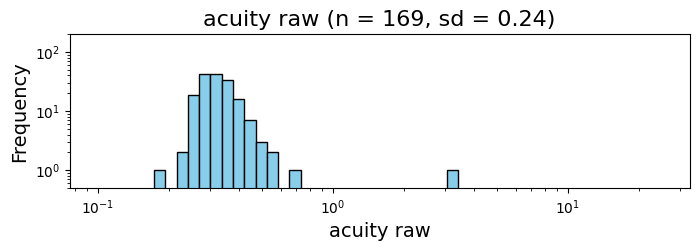

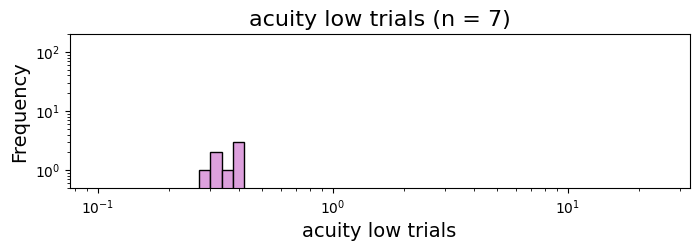

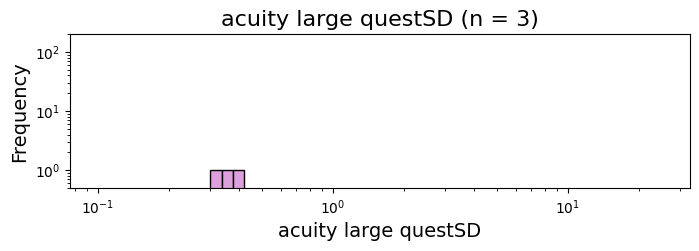

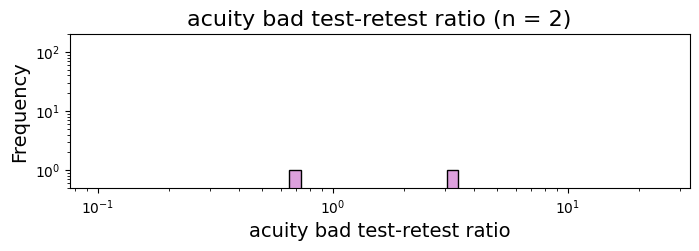

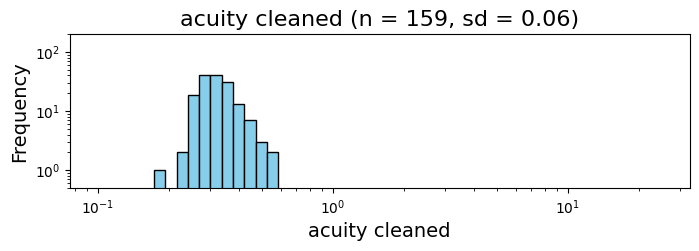

In [121]:
plot_hist_task(df_gmean_task, 'acuity', 'gmean_threshold_task',
                acuity_low_trial_ids, acuity_large_questSD_ids, acuity_bad_ratio_ids, 
                num_bins=50, min_val=0.1, max_val=25)

,prolificID,taskName,gmean_threshold_task
1,559ad287fdf99b219a612d22,crowding,9.203
5,55d51a6b8ce09000127d4821,crowding,1.241
13,56b78f11e77ebe000cbefe79,crowding,1.630
17,57334d427d01ed00098e8e69,crowding,1.844
21,581bd344930a280001062c90,crowding,2.046


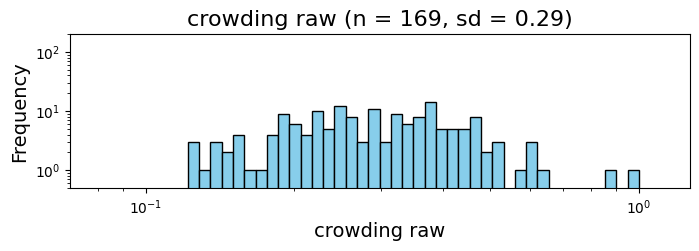

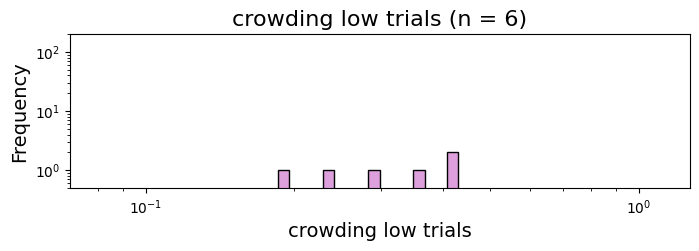

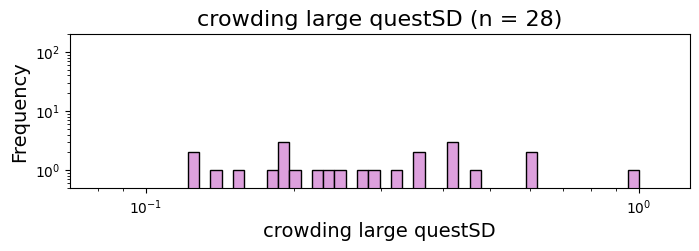

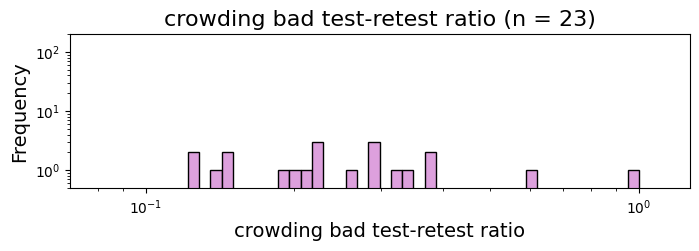

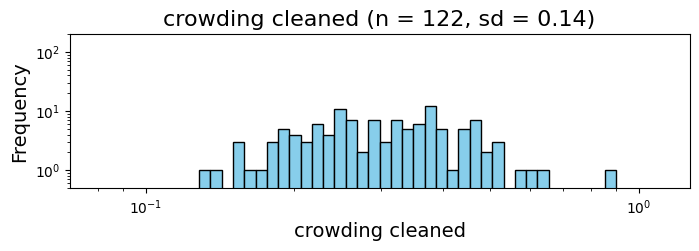

In [122]:
# crowding
plot_hist_task(df_gmean_task, 'crowding', 'gmean_threshold_task',
                crowding_low_trial_ids, crowding_large_questSD_ids, crowding_bad_ratio_ids, 
                bouma_bool=True)

,prolificID,taskName,gmean_threshold_task
3,559ad287fdf99b219a612d22,rsvp,382.974
11,5685850c333cbd000d4e042f,rsvp,1844.438
15,56b78f11e77ebe000cbefe79,rsvp,1489.517
19,57334d427d01ed00098e8e69,rsvp,1332.369
23,581bd344930a280001062c90,rsvp,1701.048


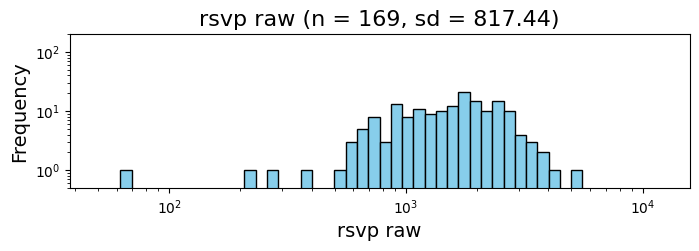

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/cw/__v4n9dd1cl59tk5n02vqjg5lj9bck/T/ipykernel_22290/3367854618.py:39: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


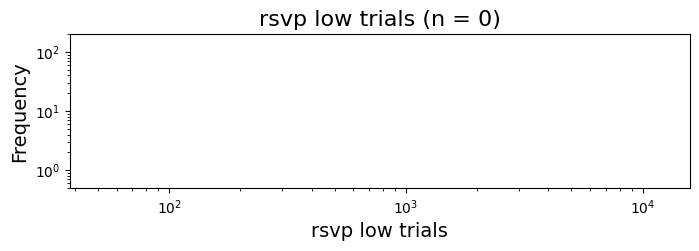

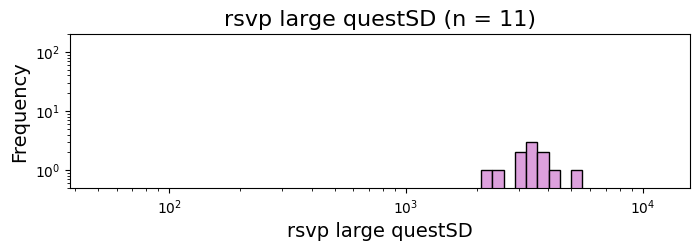

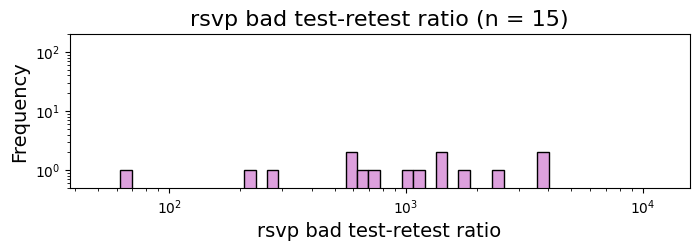

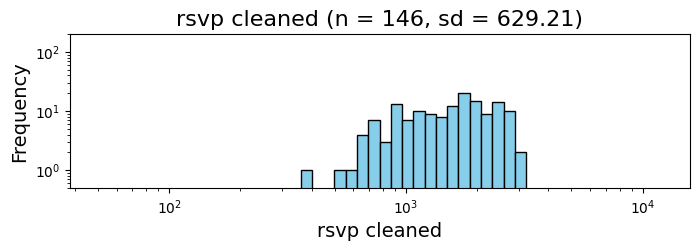

In [123]:
# rsvp
plot_hist_task(df_gmean_task, 'rsvp', 'gmean_threshold_task', 
                rsvp_low_trial_ids, rsvp_large_questSD_ids, rsvp_bad_ratio_ids, 
                num_bins=50, min_val=50, max_val=12000)

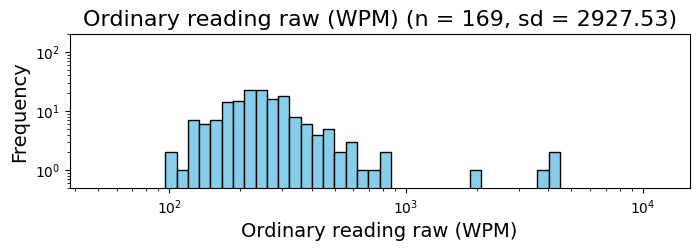

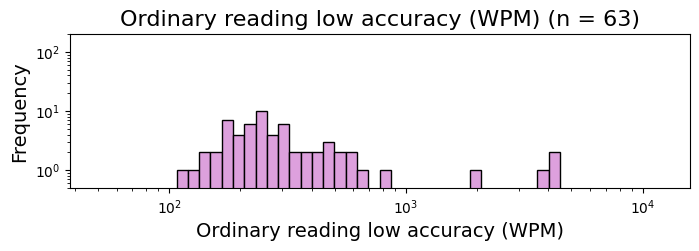

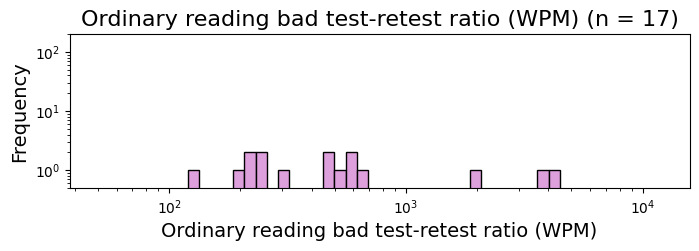

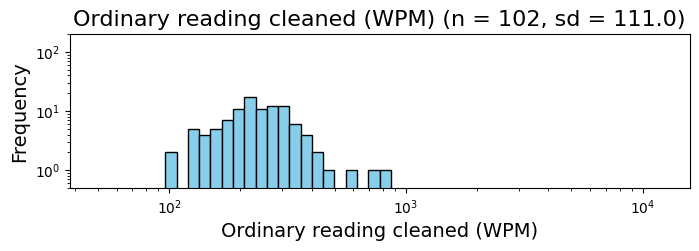

In [124]:
# ordinary reading
df_reading_gmean_task_raw = df_gmean_task[df_gmean_task['taskName'] == 'reading']
df_reading_gmean_task_low_trial = filter_including_ids(df_reading_gmean_task_raw, reading_low_accuracy_ids)
df_reading_gmean_task_bad_ratio = filter_including_ids(df_reading_gmean_task_raw, reading_bad_ratio_ids)
df_reading_gmean_task_cleaned = filter_excluding_ids(df_reading_gmean_task_raw, reading_low_accuracy_ids, reading_bad_ratio_ids)

plot_threshold_array(df_reading_gmean_task_raw['gmean_threshold_task'], 'Ordinary reading raw (WPM)', num_bins=50, min_val=50, max_val=12000)
plot_threshold_array(df_reading_gmean_task_low_trial['gmean_threshold_task'], 'Ordinary reading low accuracy (WPM)', num_bins=50, min_val=50, max_val=12000, hist_color='plum', name_sd_bool=False)
plot_threshold_array(df_reading_gmean_task_bad_ratio['gmean_threshold_task'], 'Ordinary reading bad test-retest ratio (WPM)', num_bins=50, min_val=50, max_val=12000, hist_color='plum', name_sd_bool=False)
plot_threshold_array(df_reading_gmean_task_cleaned['gmean_threshold_task'], 'Ordinary reading cleaned (WPM)', num_bins=50, min_val=50, max_val=12000)

# Analysis
- note that everything in is not logged

### Functions

In [125]:
def filter_task_df(df, taskName, 
                    low_trial_ids, large_questSD_ids, bad_ratio_ids):
    '''
    filter data by number of trials, questSD, and test-retest ratio for a given task.
    '''
    df_task_raw = df[df['taskName'] == taskName]
    df_cleaned = filter_excluding_ids(df_task_raw, low_trial_ids, large_questSD_ids, bad_ratio_ids)

    return df_cleaned

In [126]:
def plot_scatter_with_correlation(var_x, var_y, var_x_name, var_y_name,
                                  log_data_bool=True, plotXequalsY_bool=False, equal_axes_bool=True):
    """
    Plots a scatter plot of two variables from a DataFrame and computes Pearson's r.
    
    Parameters:
        var_x (list): first variable extracted from a df
        var_y (list): second variable extracted from a df
    """
    var_x = np.array(var_x)
    var_y = np.array(var_y)

    if log_data_bool:
        # Log-transform the data, avoiding log(0) or log(negative)
        var_x = np.log10(var_x)
        var_y = np.log10(var_y)
    
	# print out minimum and maximum values of the variables
    min_x = var_x.min()
    min_y = var_y.min()
    max_x = var_x.max()
    max_y = var_y.max()
    print(f'Min and max values: min_x: {min_x}, max_x: {max_x}, min_y: {min_y}, max_y: {max_y}')
    
    # Compute Pearson correlation
    valid = (~np.isnan(var_x)) & (~np.isnan(var_y))
    r, p_value = stats.pearsonr(var_x[valid], var_y[valid])

    # Determine axis limits (same for both axes)
    min_val = min(var_x.min(), var_y.min())
    min_val = min_val - abs(min_val) * 0.2
    max_val = max(var_x.max(), var_y.max())
    max_val = max_val + abs(max_val) * 0.2


    # Create the scatter plot
    plt.figure(figsize=(4, 4))  
    sns.scatterplot(x=var_x, y=var_y, s=50)

    # plot x = y
    if plotXequalsY_bool:
            plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", linewidth=1.5)
            
    # Set limits for both axes to be the same
    if equal_axes_bool:
        plt.gca().set_aspect('equal', adjustable='box')
        plt.axis('equal')


    else:
        plt.gca().set_aspect('auto', adjustable='box')  


    # Add title with Pearson's r value
    plt.title(f"measured r = {r:.2f}", fontsize=16)
    
    # Add labels
    plt.xlabel(var_x_name, fontsize=14)
    plt.ylabel(var_y_name, fontsize=14)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10) 
    
        
    # Show plot
    plt.show()


In [127]:
def make_task_wide(block_df, task_df, task_name):
    """
    block_df: columns ['prolificID','taskName','repeat','gmean_threshold_block']
    task_df : columns ['prolificID','taskName','repeat','gmean_threshold_task']
    returns: wide df with columns like ['prolificID', f'{task}_block1', ..., f'{task}_grandMean']
    """

    # 1) pivot blocks → one column per repeat
    wide_blocks = (block_df
                   .pivot(index="prolificID", columns="repeat", values="gmean_threshold_block")
                   .sort_index(axis=1))  # ensure block1, block2, ...

    # rename e.g. 1→'acuity_block1'
    wide_blocks.columns = [f"{task_name}_block{int(c)}" for c in wide_blocks.columns]

    # 2) grand mean per participant (use task_df; if multiple rows, average them)
    grand = (task_df
             .groupby("prolificID", as_index=True)["gmean_threshold_task"]
             .mean()
             .rename(f"{task_name}_grandMean")
             .to_frame())

    # combine and return
    out = wide_blocks.join(grand, how="outer").reset_index()
    return out


def build_big_df(task_to_dfs):
    """
    task_to_dfs: dict like {
        'acuity':   (acuity_gmean_block_cleaned_df,   acuity_gmean_task_cleaned_df),
        'crowding': (crowding_gmean_block_cleaned_df, crowding_gmean_task_cleaned_df),
        'rsvp':     (rsvp_gmean_block_cleaned_df,     rsvp_gmean_task_cleaned_df),
        'reading':  (reading_gmean_block_cleaned_df,  reading_gmean_task_cleaned_df),
    }
    returns one big df with prolificID rows and all task columns.
    """
    pieces = []
    for task, (block_df, task_df) in task_to_dfs.items():
        w = make_task_wide(block_df, task_df, task)
        pieces.append(w.set_index("prolificID"))

    big = pd.concat(pieces, axis=1)  # outer join on prolificID
    big = big.reset_index()
    return big

# Columns look like:
# ['prolificID', 'acuity_block1','acuity_block2',...,'acuity_grandMean',
#  'crowding_block1',...,'crowding_grandMean', 'rsvp_block1',...,'reading_grandMean']



### Filter data

In [128]:
acuity_indThresh_cleaned_df = filter_task_df(df_both_sessions, 'acuity', acuity_low_trial_ids, acuity_large_questSD_ids, acuity_bad_ratio_ids)
crowding_indThresh_cleaned_df = filter_task_df(df_both_sessions, 'crowding', crowding_low_trial_ids, crowding_large_questSD_ids, crowding_bad_ratio_ids)
rsvp_indThresh_cleaned_df = filter_task_df(df_both_sessions, 'rsvp', rsvp_low_trial_ids, rsvp_large_questSD_ids, rsvp_bad_ratio_ids)
reading_indThresh_cleaned_df = filter_task_df(df_both_sessions, 'reading', reading_low_accuracy_ids, [], reading_bad_ratio_ids) 


In [129]:
acuity_gmean_meridian_cleaned_df = filter_task_df(df_gmean_meridian, 'acuity', acuity_low_trial_ids, acuity_large_questSD_ids, acuity_bad_ratio_ids)
crowding_gmean_meridian_cleaned_df = filter_task_df(df_gmean_meridian, 'crowding', crowding_low_trial_ids, crowding_large_questSD_ids, crowding_bad_ratio_ids)
rsvp_gmean_meridian_cleaned_df = filter_task_df(df_gmean_meridian, 'rsvp', rsvp_low_trial_ids, rsvp_large_questSD_ids, rsvp_bad_ratio_ids)
reading_gmean_meridian_cleaned_df = filter_task_df(df_gmean_meridian, 'reading', reading_low_accuracy_ids, [], reading_bad_ratio_ids)

In [130]:
acuity_gmean_block_cleaned_df = filter_task_df(df_gmean_block, 'acuity', acuity_low_trial_ids, acuity_large_questSD_ids, acuity_bad_ratio_ids)
crowding_gmean_block_cleaned_df = filter_task_df(df_gmean_block, 'crowding', crowding_low_trial_ids, crowding_large_questSD_ids, crowding_bad_ratio_ids)
rsvp_gmean_block_cleaned_df = filter_task_df(df_gmean_block, 'rsvp', rsvp_low_trial_ids, rsvp_large_questSD_ids, rsvp_bad_ratio_ids)
reading_gmean_block_cleaned_df = filter_task_df(df_gmean_block, 'reading', reading_low_accuracy_ids, [], reading_bad_ratio_ids) 

acuity_gmean_task_cleaned_df = filter_task_df(df_gmean_task, 'acuity', acuity_low_trial_ids, acuity_large_questSD_ids, acuity_bad_ratio_ids)
crowding_gmean_task_cleaned_df = filter_task_df(df_gmean_task, 'crowding', crowding_low_trial_ids, crowding_large_questSD_ids, crowding_bad_ratio_ids)
rsvp_gmean_task_cleaned_df = filter_task_df(df_gmean_task, 'rsvp', rsvp_low_trial_ids, rsvp_large_questSD_ids, rsvp_bad_ratio_ids)
reading_gmean_task_cleaned_df = filter_task_df(df_gmean_task, 'reading', reading_low_accuracy_ids, [], reading_bad_ratio_ids) 

### Create and save pivot table for correlation analysis

In [131]:
task_to_dfs = {
    "acuity":   (acuity_gmean_block_cleaned_df,   acuity_gmean_task_cleaned_df),
    "crowding": (crowding_gmean_block_cleaned_df, crowding_gmean_task_cleaned_df),
    "rsvp":     (rsvp_gmean_block_cleaned_df,     rsvp_gmean_task_cleaned_df),
    "reading":  (reading_gmean_block_cleaned_df,  reading_gmean_task_cleaned_df),
}

big_df = build_big_df(task_to_dfs)

big_df_log = big_df.copy()
numeric_cols = big_df.select_dtypes(include=[np.number]).columns
big_df_log[numeric_cols] = big_df[numeric_cols].map(
    lambda x: np.log10(x) if x > 0 else np.nan
)

In [ ]:
# big_df_log.to_csv('tidy_corr_data_log.csv', index=False)

### Create pivot table pt 2: include R and L thresholds, separately

In [133]:
all_tasks_indThresh_cleaned_df = pd.concat([
    acuity_indThresh_cleaned_df,
    crowding_indThresh_cleaned_df,
    rsvp_indThresh_cleaned_df,
    reading_indThresh_cleaned_df
], ignore_index=True)

In [134]:
all_tasks_indThresh_cleaned_wide = all_tasks_indThresh_cleaned_df.pivot(index="prolificID", columns=["conditionName"], values="threshold")

In [135]:
display(all_tasks_indThresh_cleaned_wide.head())

conditionName,acuity_L8_block1,acuity_L8_block2,acuity_R8_block1,acuity_R8_block2,crowding_L8_block1,crowding_L8_block2,crowding_L8_block3,crowding_L8_block4,crowding_R8_block1,crowding_R8_block2,crowding_R8_block3,crowding_R8_block4,reading_Beaver_block1,reading_Desert_block1,reading_Islands_block2,reading_Winter_block2,rsvp_foveal_block1,rsvp_foveal_block2
prolificID,,,,,,,,,,,,,,,,,,
559ad287fdf99b219a612d22,0.477,0.332,0.426,0.304,10.063,10.191,22.582,16.104,5.243,5.824,4.337,10.419,211.177,199.190,148.154,209.097,308.722,475.083
55d51a6b8ce09000127d4821,0.253,0.225,0.305,0.236,1.447,0.584,0.652,0.385,1.459,2.516,3.399,2.124,264.753,184.963,197.670,236.528,NaN,NaN
5685850c333cbd000d4e042f,0.359,0.223,0.353,0.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.742,298.242,222.594,214.734,1727.999,1968.722
56b78f11e77ebe000cbefe79,0.351,0.406,0.342,0.424,2.821,4.395,2.047,1.664,0.854,0.733,1.827,1.033,361.048,252.979,277.184,331.416,1111.310,1996.437
57334d427d01ed00098e8e69,0.279,0.262,0.352,0.313,3.490,1.892,1.406,2.778,1.437,1.573,1.547,1.481,256.631,201.165,171.365,238.262,1496.296,1186.401


### Create pivot table pt 3: gmean for each meridian

In [136]:
meridian_dfs = {
    "acuity":   (acuity_gmean_meridian_cleaned_df),
    "crowding": (crowding_gmean_meridian_cleaned_df),
    "rsvp":     (rsvp_gmean_meridian_cleaned_df),
    "reading":  (reading_gmean_meridian_cleaned_df),
}


In [137]:
pieces = []
for task, df in meridian_dfs.items():
    wide_meridians = (df
                      .pivot(index="prolificID", columns="meridian", values="gmean_threshold_meridian")
                      .sort_index(axis=1))  # ensure block1, block2, ...
    
    # rename
    wide_meridians.columns = [f"{task}_{c}" for c in wide_meridians.columns]
               
    pieces.append(wide_meridians)

    
all_tasks_meridian_cleaned_wide = pd.concat(pieces, axis=1)  # outer join on prolificID
all_tasks_meridian_cleaned_wide = all_tasks_meridian_cleaned_wide.reset_index()                   

In [138]:
display(all_tasks_meridian_cleaned_wide.head())

,prolificID,acuity_L8,acuity_R8,crowding_L8,crowding_R8,rsvp_foveal,reading_first,reading_second
0,559ad287fdf99b219a612d22,0.398,0.360,13.897,6.095,382.974,205.096,176.008
1,55d51a6b8ce09000127d4821,0.238,0.268,0.679,2.269,NaN,221.291,216.228
2,5685850c333cbd000d4e042f,0.283,0.301,NaN,NaN,1844.438,260.619,218.629
3,56b78f11e77ebe000cbefe79,0.378,0.381,2.549,1.042,1489.517,302.221,303.090
4,57334d427d01ed00098e8e69,0.271,0.332,2.254,1.508,1332.369,227.211,202.064


## Test-retest

In [139]:
print(crowding_gmean_block_cleaned_df.head())

                  prolificID  taskName  repeat  gmean_threshold_block
2   559ad287fdf99b219a612d22  crowding       1                  7.263
3   559ad287fdf99b219a612d22  crowding       2                  7.704
4   559ad287fdf99b219a612d22  crowding       3                  9.897
5   559ad287fdf99b219a612d22  crowding       4                 12.953
12  55d51a6b8ce09000127d4821  crowding       1                  1.453


Min and max values: min_x: -0.2541217895000001, max_x: 0.8611393535, min_y: -0.22551890549999998, max_y: 0.959867745


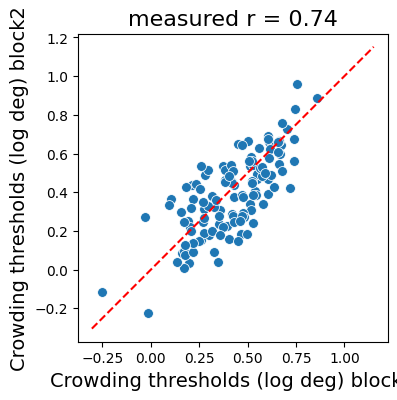

In [140]:
plot_scatter_with_correlation(crowding_gmean_block_cleaned_df[crowding_gmean_block_cleaned_df['repeat']==1]['gmean_threshold_block'],
                              crowding_gmean_block_cleaned_df[crowding_gmean_block_cleaned_df['repeat']==2]['gmean_threshold_block'], 
                              'Crowding thresholds (log deg) block1', 'Crowding thresholds (log deg) block2', plotXequalsY_bool=True)

Min and max values: min_x: -0.43474875900000004, max_x: 0.9954958149999998, min_y: -0.36335442, max_y: 1.112376912


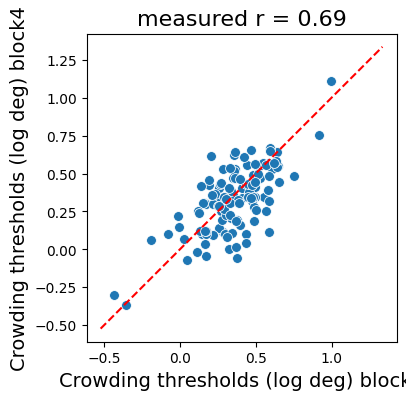

In [141]:
plot_scatter_with_correlation(crowding_gmean_block_cleaned_df[crowding_gmean_block_cleaned_df['repeat']==3]['gmean_threshold_block'],
                              crowding_gmean_block_cleaned_df[crowding_gmean_block_cleaned_df['repeat']==4]['gmean_threshold_block'], 
                              'Crowding thresholds (log deg) block3', 'Crowding thresholds (log deg) block4', plotXequalsY_bool=True)


Min and max values: min_x: 2.4895677923836437, max_x: 3.547292778383643, min_y: 2.6681691743836438, max_y: 3.547292778383643


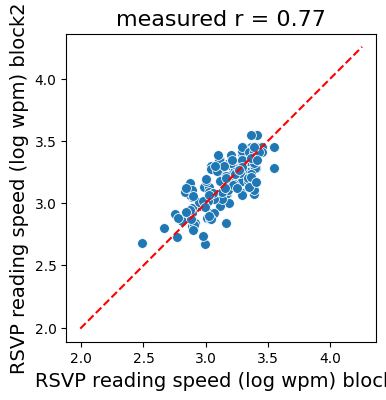

In [142]:
plot_scatter_with_correlation(rsvp_gmean_block_cleaned_df[rsvp_gmean_block_cleaned_df['repeat']==1]['gmean_threshold_block'],
                              rsvp_gmean_block_cleaned_df[rsvp_gmean_block_cleaned_df['repeat']==2]['gmean_threshold_block'], 
                              'RSVP reading speed (log wpm) block1', 'RSVP reading speed (log wpm) block2', plotXequalsY_bool=True)


Min and max values: min_x: 2.0150021020110365, max_x: 3.0648266482278204, min_y: 1.9831391354309844, max_y: 2.790105670579416


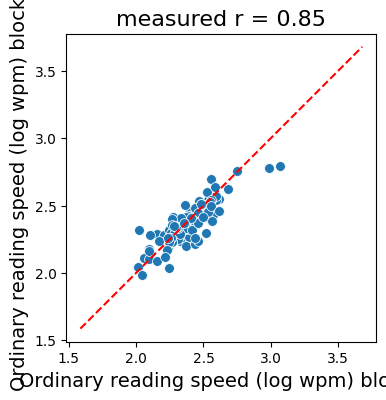

In [143]:
plot_scatter_with_correlation(reading_gmean_block_cleaned_df[reading_gmean_block_cleaned_df['repeat']==1]['gmean_threshold_block'],
                              reading_gmean_block_cleaned_df[reading_gmean_block_cleaned_df['repeat']==2]['gmean_threshold_block'], 
                              'Ordinary reading speed (log wpm) block1', 'Ordinary reading speed (log wpm) block2', plotXequalsY_bool=True)


## Is there left-right asymmetry?

In [144]:
# plot_scatter_with_correlation(df_subj_avg, "crowding_R8", "crowding_L8", 
#                               'Crowding, right vs. left', plotXequalsY_bool=True)

In [145]:
# plot_scatter_with_correlation(df_subj_avg, "acuity_R8", "acuity_L8", 
#                               'Letter acuity, right vs. left', plotXequalsY_bool=True)

## Correlation between tasks

### Scatter plots with measured R

In [146]:
acuity_cleaned_narrow = acuity_gmean_task_cleaned_df.rename(columns={"gmean_threshold_task": "acuity_gmean_task"})[
    ["prolificID", "acuity_gmean_task"]
]
crowding_cleaned_narrow = crowding_gmean_task_cleaned_df.rename(columns={"gmean_threshold_task": "crowding_gmean_task"})[
    ["prolificID", "crowding_gmean_task"]
]
rsvp_cleaned_narrow  = rsvp_gmean_task_cleaned_df.rename(columns={"gmean_threshold_task": "rsvp_gmean_task"})[
    ["prolificID", "rsvp_gmean_task"]
]
reading_cleaned_narrow = reading_gmean_task_cleaned_df.rename(columns={"gmean_threshold_task": "reading_gmean_task"})[
    ["prolificID", "reading_gmean_task"]
]

In [147]:
display(crowding_cleaned_narrow.head())

,prolificID,crowding_gmean_task
1,559ad287fdf99b219a612d22,9.203
5,55d51a6b8ce09000127d4821,1.241
13,56b78f11e77ebe000cbefe79,1.630
17,57334d427d01ed00098e8e69,1.844
21,581bd344930a280001062c90,2.046


Min and max values: min_x: -0.27199130962500007, max_x: 0.963933189, min_y: 2.5831688088836433, max_y: 3.4791687078836437


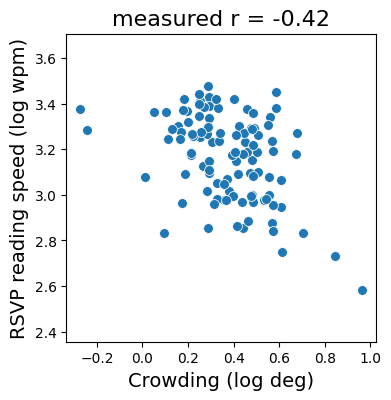

In [148]:
paired_crowding_rsvp = pd.merge(crowding_cleaned_narrow, rsvp_cleaned_narrow, on="prolificID", how="inner")
plot_scatter_with_correlation(paired_crowding_rsvp['crowding_gmean_task'],
                              paired_crowding_rsvp['rsvp_gmean_task'], 
                              'Crowding (log deg)', 'RSVP reading speed (log wpm)')


Min and max values: min_x: 0.09301661327499995, max_x: 0.963933189, min_y: 2.0128087067391625, max_y: 2.9274661594036187


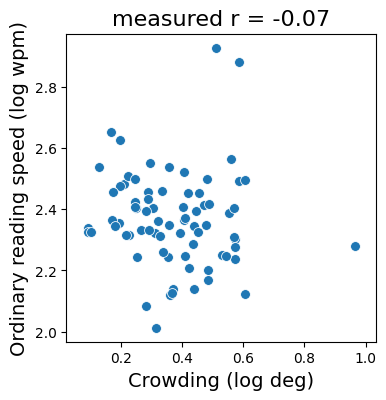

In [149]:
paired_crowding_reading = pd.merge(crowding_cleaned_narrow, reading_cleaned_narrow, on="prolificID", how="inner")
plot_scatter_with_correlation(paired_crowding_reading['crowding_gmean_task'],
                              paired_crowding_reading['reading_gmean_task'], 
                              'Crowding (log deg)', 'Ordinary reading speed (log wpm)')


Min and max values: min_x: -0.27199130962500007, max_x: 0.963933189, min_y: -0.7336790287500001, max_y: -0.2613254347500001


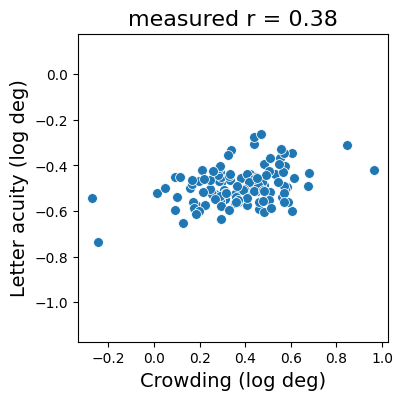

In [150]:
paired_crowding_acuity = pd.merge(crowding_cleaned_narrow, acuity_cleaned_narrow, on="prolificID", how="inner")
plot_scatter_with_correlation(paired_crowding_acuity['crowding_gmean_task'],
                              paired_crowding_acuity['acuity_gmean_task'], 
                              'Crowding (log deg)', 'Letter acuity (log deg)')

Min and max values: min_x: -0.7336790287500001, max_x: -0.2613254347500001, min_y: 2.5831688088836433, max_y: 3.4997970328836434


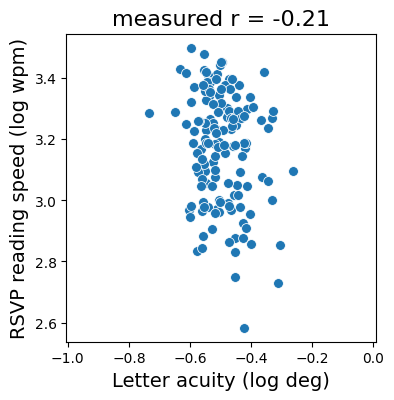

In [151]:
paired_acuity_rsvp = pd.merge(acuity_cleaned_narrow, rsvp_cleaned_narrow, on="prolificID", how="inner")
plot_scatter_with_correlation(paired_acuity_rsvp['acuity_gmean_task'],
                              paired_acuity_rsvp['rsvp_gmean_task'], 
                              'Letter acuity (log deg)', 'RSVP reading speed (log wpm)')

Min and max values: min_x: -0.65051440425, max_x: -0.2613254347500001, min_y: 2.0128087067391625, max_y: 2.9274661594036187


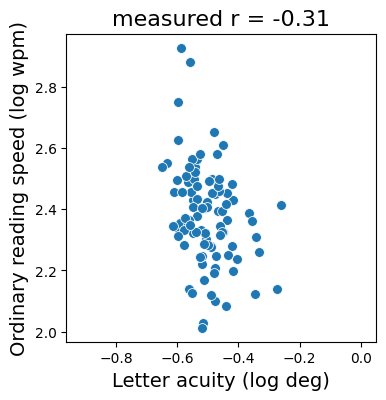

In [152]:
paired_acuity_reading = pd.merge(acuity_cleaned_narrow, reading_cleaned_narrow, on="prolificID", how="inner")
plot_scatter_with_correlation(paired_acuity_reading['acuity_gmean_task'],
                              paired_acuity_reading['reading_gmean_task'], 
                              'Letter acuity (log deg)', 'Ordinary reading speed (log wpm)')

### Data frame with measured and corrected R

In [153]:
def summarize_task(X):
    """
    df_task: long df with columns ['prolificID','repeat','gmean_threshold_block'] (taskName can be present/ignored)
    Returns a Series with within/between variances, grand mean, and noise ceiling.
    """

    # per-participant mean across repeats
    subj_mean = X.mean(axis=1, skipna=True)

    # stats
    within_var = X.var(axis=1, ddof=1).mean(skipna=True)
    between_var = np.nanvar(subj_mean.to_numpy(), ddof=1)
    grand_mean = subj_mean.mean(skipna=True)

    # split-half reliability → Spearman–Brown
    if X.shape[1] < 2:
        r_ceiling = np.nan
    else:
        n = X.shape[1]
        first, last = X.iloc[:, :n//2].mean(axis=1), X.iloc[:, n//2:].mean(axis=1)
        odd, even  = X.iloc[:, 1::2].mean(axis=1), X.iloc[:, 0::2].mean(axis=1)

        def r(a,b):
            a, b = a.to_numpy(), b.to_numpy()
            m = np.isfinite(a) & np.isfinite(b)
            return np.nan if m.sum() < 3 else stats.pearsonr(a[m], b[m])[0]

        r_FL, r_OE = r(first,last), r(odd,even)
        r_i = np.sqrt(r_FL * r_OE) if np.isfinite(r_FL) and np.isfinite(r_OE) else np.nan
        if np.isnan(r_i):
            r_ceiling = np.nan
        else:
            r_i = float(np.clip(r_i, 0.0, 0.999999))
            r_ceiling = (2 * r_i) / (1 + r_i)

    return pd.Series({
        "within_subj_variance": within_var,
        "btw_subj_variance": between_var,
        "mean": grand_mean,
        "r_ceiling": r_ceiling
    })

def summarize_many(task_dfs):
    """
    task_dfs: dict like {'acuity': df_acuity, 'crowding': df_crowding, ...}
    Returns one row per task.
    """
    rows = []
    for task, df_task_wide in task_dfs.items():
        s = summarize_task(df_task_wide)
        s.name = task
        rows.append(s)
    return pd.DataFrame(rows).reset_index(names="task")

def pivot_for_summarize(df, columnNames="repeat", valueNames="gmean_threshold_block", log10_bool=True):
    """
    df: long df with columns ['prolificID','taskName','repeat','gmean_threshold_block']
    returns: wide df with one row per participant and one column per repeat
    """
    X = df.pivot(index="prolificID", columns=columnNames, values=valueNames).sort_index(axis=1)
    if log10_bool:
        assert (X > 0).all().all(), "Fatal: Log10 transformation requires all values to be positive."
        X = np.log10(X)

    return X


In [154]:
def print_measured_corrected_r(df, var_x, var_y, r_ceiling_x, r_ceiling_y, log10_bool=False):
    """
    Compute and print measured and corrected Pearson correlations between two variables.

    Parameters:
        df (pd.DataFrame): Data containing the variables.
        var_x (str): Name of the first variable (x-axis).
        var_y (str): Name of the second variable (y-axis).
        r_ceiling_x (float): Noise ceiling (reliability) for var_x.
        r_ceiling_y (float): Noise ceiling (reliability) for var_y.

    Returns:
        pd.DataFrame: Single-row dataframe with results.
    """
    df = df.copy()

    if log10_bool:
        df[var_x] = np.log10(df[var_x].where(df[var_x] > 0))
        df[var_y] = np.log10(df[var_y].where(df[var_y] > 0))
    
    # Filter for non-NaN pairs
    valid_mask = df[[var_x, var_y]].notna().all(axis=1)
    x_vals = df.loc[valid_mask, var_x]
    y_vals = df.loc[valid_mask, var_y]

    # Compute measured correlation
    r_measured, p_value = stats.pearsonr(x_vals, y_vals)

    # Compute combined noise ceiling
    r_ceiling_combined = np.sqrt(r_ceiling_x * r_ceiling_y)

    # Apply correction
    r_corrected = r_measured / r_ceiling_combined

    # Print results
    print(
        f"Correlating {var_x} vs. {var_y}:\n"
        f"  r_measured = {r_measured:.2f}\n"
        f"  r_corrected = {r_corrected:.2f}\n"
        f"  Noise ceilings: {var_x} = {r_ceiling_x:.2f}, "
        f"{var_y} = {r_ceiling_y:.2f}, combined = {r_ceiling_combined:.2f}"
    )

    # Return results in dataframe form
    return pd.DataFrame({
        'var_x': [var_x],
        'var_y': [var_y],
        'noise_ceiling_x': [r_ceiling_x],
        'noise_ceiling_y': [r_ceiling_y],
        'noise_ceiling_combined': [r_ceiling_combined],
        'r_measured': [r_measured],
        'r_corrected': [r_corrected]
    })


In [155]:
block_dfs = {
    "acuity": pivot_for_summarize(acuity_gmean_block_cleaned_df),
    "crowding": pivot_for_summarize(crowding_gmean_block_cleaned_df),
    "rsvp": pivot_for_summarize(rsvp_gmean_block_cleaned_df),
    "reading": pivot_for_summarize(reading_gmean_block_cleaned_df)
}

# Summarize all tasks at once
all_tasks_summary = summarize_many(block_dfs)
print(all_tasks_summary)


       task  within_subj_variance  btw_subj_variance   mean  r_ceiling
0    acuity                 0.003              0.006 -0.496      0.723
1  crowding                 0.014              0.033  0.374      0.902
2      rsvp                 0.009              0.035  3.170      0.869
3   reading                 0.005              0.026  2.377      0.918


In [156]:
results_crowding_rsvp = print_measured_corrected_r(
    paired_crowding_rsvp,
    var_x="crowding_gmean_task",
    var_y="rsvp_gmean_task",
    r_ceiling_x=all_tasks_summary.loc[all_tasks_summary['task']=='crowding','r_ceiling'].iloc[0],
    r_ceiling_y=all_tasks_summary.loc[all_tasks_summary['task']=='rsvp','r_ceiling'].iloc[0],
    log10_bool=True
)

results_crowding_reading = print_measured_corrected_r(
    paired_crowding_reading,
    var_x="crowding_gmean_task",
    var_y="reading_gmean_task",
    r_ceiling_x=all_tasks_summary.loc[all_tasks_summary['task']=='crowding','r_ceiling'].iloc[0],
    r_ceiling_y=all_tasks_summary.loc[all_tasks_summary['task']=='reading','r_ceiling'].iloc[0],
    log10_bool=True
)

results_crowding_acuity = print_measured_corrected_r(
    paired_crowding_acuity,
    var_x="crowding_gmean_task",
    var_y="acuity_gmean_task",
    r_ceiling_x=all_tasks_summary.loc[all_tasks_summary['task']=='crowding','r_ceiling'].iloc[0],
    r_ceiling_y=all_tasks_summary.loc[all_tasks_summary['task']=='acuity','r_ceiling'].iloc[0],
    log10_bool=True
)

results_acuity_rsvp = print_measured_corrected_r(
    paired_acuity_rsvp,
    var_x="acuity_gmean_task",
    var_y="rsvp_gmean_task",
    r_ceiling_x=all_tasks_summary.loc[all_tasks_summary['task']=='acuity','r_ceiling'].iloc[0],
    r_ceiling_y=all_tasks_summary.loc[all_tasks_summary['task']=='rsvp','r_ceiling'].iloc[0],
    log10_bool=True
)

results_acuity_reading = print_measured_corrected_r(
    paired_acuity_reading,
    var_x="acuity_gmean_task",
    var_y="reading_gmean_task",
    r_ceiling_x=all_tasks_summary.loc[all_tasks_summary['task']=='acuity','r_ceiling'].iloc[0],
    r_ceiling_y=all_tasks_summary.loc[all_tasks_summary['task']=='reading','r_ceiling'].iloc[0],
    log10_bool=True
)


Correlating crowding_gmean_task vs. rsvp_gmean_task:
  r_measured = -0.42
  r_corrected = -0.47
  Noise ceilings: crowding_gmean_task = 0.90, rsvp_gmean_task = 0.87, combined = 0.89
Correlating crowding_gmean_task vs. reading_gmean_task:
  r_measured = -0.07
  r_corrected = -0.07
  Noise ceilings: crowding_gmean_task = 0.90, reading_gmean_task = 0.92, combined = 0.91
Correlating crowding_gmean_task vs. acuity_gmean_task:
  r_measured = 0.38
  r_corrected = 0.47
  Noise ceilings: crowding_gmean_task = 0.90, acuity_gmean_task = 0.72, combined = 0.81
Correlating acuity_gmean_task vs. rsvp_gmean_task:
  r_measured = -0.21
  r_corrected = -0.26
  Noise ceilings: acuity_gmean_task = 0.72, rsvp_gmean_task = 0.87, combined = 0.79
Correlating acuity_gmean_task vs. reading_gmean_task:
  r_measured = -0.31
  r_corrected = -0.39
  Noise ceilings: acuity_gmean_task = 0.72, reading_gmean_task = 0.92, combined = 0.81


In [157]:
results_df = pd.concat([results_crowding_rsvp, results_crowding_reading,
                       results_crowding_acuity, results_acuity_rsvp,
                       results_acuity_reading], axis=0).reset_index(drop=True)

In [158]:
display(results_df)

,var_x,var_y,noise_ceiling_x,noise_ceiling_y,noise_ceiling_combined,r_measured,r_corrected
0,crowding_gmean_task,rsvp_gmean_task,0.902,0.869,0.885,-0.418,-0.472
1,crowding_gmean_task,reading_gmean_task,0.902,0.918,0.910,-0.066,-0.072
2,crowding_gmean_task,acuity_gmean_task,0.902,0.723,0.807,0.378,0.468
3,acuity_gmean_task,rsvp_gmean_task,0.723,0.869,0.793,-0.205,-0.259
4,acuity_gmean_task,reading_gmean_task,0.723,0.918,0.815,-0.314,-0.385


In [159]:
display(results_df.round(2))

,var_x,var_y,noise_ceiling_x,noise_ceiling_y,noise_ceiling_combined,r_measured,r_corrected
0,crowding_gmean_task,rsvp_gmean_task,0.900,0.870,0.890,-0.420,-0.470
1,crowding_gmean_task,reading_gmean_task,0.900,0.920,0.910,-0.070,-0.070
2,crowding_gmean_task,acuity_gmean_task,0.900,0.720,0.810,0.380,0.470
3,acuity_gmean_task,rsvp_gmean_task,0.720,0.870,0.790,-0.210,-0.260
4,acuity_gmean_task,reading_gmean_task,0.720,0.920,0.810,-0.310,-0.390


# Additional analyses

## Ordinary reading plots, each psg separately

In [160]:
display(df_reading_allThresh_cleaned)

,prolificID,conditionName,taskName,meridian,repeat,threshold,numTrialsSent,questSD,readingCQAccuracy
1183,5f0788c06b220f03231666a0,reading_Beaver_block1,reading,first,1,491.794,NaN,NaN,100.000
1184,5f0788c06b220f03231666a0,reading_Winter_block2,reading,second,1,477.821,NaN,NaN,100.000
1185,64837ba51422d817b62cc5cc,reading_Beaver_block1,reading,first,1,247.812,NaN,NaN,80.000
1186,64837ba51422d817b62cc5cc,reading_Winter_block2,reading,second,1,197.966,NaN,NaN,60.000
1187,6778842e3f7e2e62756f7178,reading_Beaver_block1,reading,first,1,225.747,NaN,NaN,80.000
...,...,...,...,...,...,...,...,...,...
3025,5d7bde81c7390f00169b2fdf,reading_Islands_block2,reading,second,2,273.827,NaN,NaN,80.000
3026,5f98099d48060d0450394002,reading_Desert_block1,reading,first,2,271.484,NaN,NaN,100.000
3027,5f98099d48060d0450394002,reading_Islands_block2,reading,second,2,289.462,NaN,NaN,100.000
3028,5fb281433a31c686f0ec3ecb,reading_Desert_block1,reading,first,2,480.490,NaN,NaN,60.000


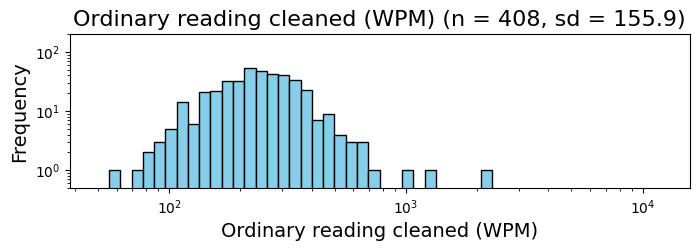

In [161]:
# ordinary reading
# df_reading_allThresh_raw = df_both_sessions[df_both_sessions['taskName'] == 'reading']
# df_reading_allThresh_cleaned = filter_excluding_ids(df_reading_allThresh_raw, reading_low_accuracy_ids, reading_bad_ratio_ids)
plot_threshold_array(df_reading_allThresh_cleaned['threshold'], 'Ordinary reading cleaned (WPM)', num_bins=50, min_val=50, max_val=12000)

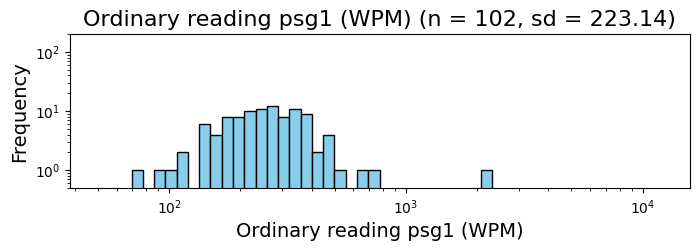

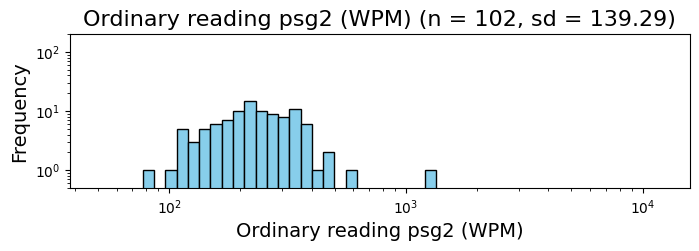

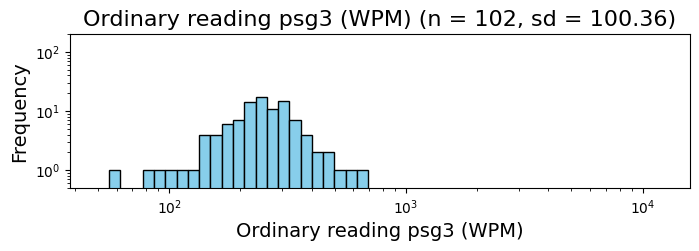

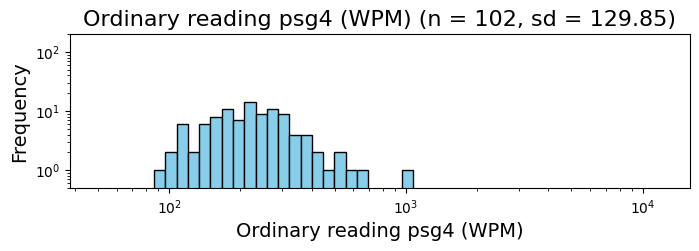

In [162]:
plot_threshold_array(df_reading_allThresh_cleaned[(df_reading_allThresh_cleaned['meridian'] == 'first') & (df_reading_allThresh_cleaned['repeat'] == 1)]['threshold'], 
                     'Ordinary reading psg1 (WPM)', num_bins=50, min_val=50, max_val=12000)
plot_threshold_array(df_reading_allThresh_cleaned[(df_reading_allThresh_cleaned['meridian'] == 'second') & (df_reading_allThresh_cleaned['repeat'] == 1)]['threshold'], 
                     'Ordinary reading psg2 (WPM)', num_bins=50, min_val=50, max_val=12000)
plot_threshold_array(df_reading_allThresh_cleaned[(df_reading_allThresh_cleaned['meridian'] == 'first') & (df_reading_allThresh_cleaned['repeat'] == 2)]['threshold'], 
                     'Ordinary reading psg3 (WPM)', num_bins=50, min_val=50, max_val=12000)
plot_threshold_array(df_reading_allThresh_cleaned[(df_reading_allThresh_cleaned['meridian'] == 'second') & (df_reading_allThresh_cleaned['repeat'] == 2)]['threshold'], 
                     'Ordinary reading psg4 (WPM)', num_bins=50, min_val=50, max_val=12000)

## Correlations, R and L thresholds

### Functions:

In [163]:
def correlation_matrix(df_data, df_r_ceiling, var_ceiling_pairs, log10_bool=True):
    """
    Create a correlation matrix for the given DataFrame and noise ceiling DataFrame.

    Parameters:
        df_data (pd.DataFrame): DataFrame containing the data to correlate.
        df_r_ceiling (pd.DataFrame): DataFrame containing the noise ceilings.
        var_ceiling_pairs (dict): Dictionary mapping variable names to their noise ceiling names.
        log10_bool (bool): Whether to apply log10 transformation to the data.

    Returns:
        pd.DataFrame: Correlation matrix with measured and corrected correlations.
    """
    df_data = df_data.copy()
    df_r_ceiling = df_r_ceiling.copy()
    results = []
    
    for var_x, var_y in itertools.combinations(df_data.columns, 2):
        print(var_x, var_y)
        r_ceiling_x = df_r_ceiling.loc[df_r_ceiling['task'] == var_ceiling_pairs[var_x], 'r_ceiling'].values[0]
        r_ceiling_y = df_r_ceiling.loc[df_r_ceiling['task'] == var_ceiling_pairs[var_y], 'r_ceiling'].values[0]
        
        result = print_measured_corrected_r(
            df_data,
            var_x=var_x,
            var_y=var_y,
            r_ceiling_x=r_ceiling_x,
            r_ceiling_y=r_ceiling_y,
            log10_bool=log10_bool
        )
        
        results.append(result)

    return pd.concat(results, ignore_index=True)

In [164]:
def long_to_square(df_long, value_col="r_measured"):
    """
    Convert your long-form correlation table into a square matrix.
    
    Parameters:
        df_long: DataFrame with columns ['var_x','var_y',...,value_col]
        value_col: 'r_measured' or 'r_corrected'
    """
    vars_all = sorted(set(df_long["var_x"]).union(df_long["var_y"]))
    R = pd.DataFrame(np.nan, index=vars_all, columns=vars_all, dtype=float)

    for _, row in df_long.iterrows():
        x, y, val = row["var_x"], row["var_y"], row[value_col]
        R.loc[x, y] = val
        R.loc[y, x] = val

    np.fill_diagonal(R.values, 1.0)
    return R

def plot_corr_heatmap(df_long, value_col="r_measured", title=None, mask_upper=True, mask_diag=True, fontSize=10):
    """
    Plot a heatmap from the long correlation table.
    
    Parameters:
        df_long: output from correlation_matrix(...)
        value_col: 'r_measured' or 'r_corrected'
        mask_upper: True = show only lower triangle for readability
    """
    R = long_to_square(df_long, value_col=value_col)

    mask = None
    if mask_upper or mask_diag:
        mask = np.zeros_like(R, dtype=bool)
        if mask_upper:
            mask[np.triu_indices_from(mask, k=1)] = True  # mask above-diagonal
        if mask_diag:
            np.fill_diagonal(mask, True)  # mask diagonal

    plt.figure(figsize=(9, 8))
    ax = sns.heatmap(
        R, annot=True, fmt=".2f", cmap="RdBu_r",
        vmin=-1, vmax=1, center=0, square=True,
        mask=mask, cbar_kws={"label": "r"},
        annot_kws={"size": fontSize}
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(title or f"Correlation matrix ({value_col})")
    plt.tight_layout()
    plt.show()


### Calculate r ceiling

In [165]:
# # summary, coming from all thresholds, separating by meridian/passage
# indThresh_dfs = {
#     "acuity": pivot_for_summarize(acuity_indThresh_cleaned_df, columnNames=['repeat','meridian'], valueNames='threshold'),
#     "crowding": pivot_for_summarize(crowding_indThresh_cleaned_df, columnNames=['repeat','meridian'], valueNames='threshold'),
#     "rsvp": pivot_for_summarize(rsvp_indThresh_cleaned_df, columnNames=['repeat','meridian'], valueNames='threshold'),
#     "reading": pivot_for_summarize(reading_indThresh_cleaned_df, columnNames=['repeat','meridian'], valueNames='threshold')
# }

# # Summarize all tasks at once
# all_tasks_summary_from_indThresh = summarize_many(indThresh_dfs)
# print(all_tasks_summary_from_indThresh)

In [166]:
# # summary, coming from only 1 test and 1 retest for each threshold, separating by meridian/passage
# indThresh_dfs_truncated = {
#     "acuity": pivot_for_summarize(acuity_indThresh_cleaned_df, columnNames=['repeat','meridian'], valueNames='threshold'),
#     "crowding": pivot_for_summarize(crowding_indThresh_cleaned_df[(crowding_indThresh_cleaned_df['repeat'] == 1) | (crowding_indThresh_cleaned_df['repeat'] == 2)], columnNames=['repeat','meridian'], valueNames='threshold'),
#     "rsvp": pivot_for_summarize(rsvp_indThresh_cleaned_df, columnNames=['repeat','meridian'], valueNames='threshold'),
#     "reading": pivot_for_summarize(reading_indThresh_cleaned_df[reading_indThresh_cleaned_df['repeat'] == 1], columnNames=['repeat','meridian'], valueNames='threshold')
# }

# # Summarize all tasks at once
# all_tasks_summary_from_indThresh_truncated = summarize_many(indThresh_dfs_truncated)
# print(all_tasks_summary_from_indThresh_truncated)

In [167]:
# summary, coming from all repeats for each threshold, separating by meridian/passage
indThresh_dfs_meridian = {
    "acuity_R": pivot_for_summarize(acuity_indThresh_cleaned_df[acuity_indThresh_cleaned_df['meridian'] == 'R8'], valueNames='threshold'),
    "acuity_L": pivot_for_summarize(acuity_indThresh_cleaned_df[acuity_indThresh_cleaned_df['meridian'] == 'L8'], valueNames='threshold'),
    "crowding_R": pivot_for_summarize(crowding_indThresh_cleaned_df[crowding_indThresh_cleaned_df['meridian'] == 'R8'], valueNames='threshold'),
    "crowding_L": pivot_for_summarize(crowding_indThresh_cleaned_df[crowding_indThresh_cleaned_df['meridian'] == 'L8'], valueNames='threshold'),
    "rsvp": pivot_for_summarize(rsvp_indThresh_cleaned_df, valueNames='threshold'), # rsvp has no meridian
    "reading_firstpsg": pivot_for_summarize(reading_indThresh_cleaned_df[reading_indThresh_cleaned_df['meridian'] == 'first'], valueNames='threshold'),
    "reading_secondpsg": pivot_for_summarize(reading_indThresh_cleaned_df[reading_indThresh_cleaned_df['meridian'] == 'second'], valueNames='threshold')

}

# Summarize all tasks at once
all_tasks_summary_from_indThresh_meridian = summarize_many(indThresh_dfs_meridian)
display(all_tasks_summary_from_indThresh_meridian)

,task,within_subj_variance,btw_subj_variance,mean,r_ceiling
0,acuity_R,0.006,0.007,-0.496,0.603
1,acuity_L,0.005,0.007,-0.495,0.666
2,crowding_R,0.027,0.040,0.317,0.824
3,crowding_L,0.025,0.045,0.431,0.874
4,rsvp,0.009,0.035,3.170,0.869
5,reading_firstpsg,0.012,0.028,2.397,0.794
6,reading_secondpsg,0.011,0.028,2.356,0.806


In [168]:
# summary, coming from only 1 test and 1 retest for each threshold, separating by meridian/passage
indThresh_dfs_meridian_truncated = {
    "acuity_R": pivot_for_summarize(acuity_indThresh_cleaned_df[acuity_indThresh_cleaned_df['meridian'] == 'R8'], valueNames='threshold'),
    "acuity_L": pivot_for_summarize(acuity_indThresh_cleaned_df[acuity_indThresh_cleaned_df['meridian'] == 'L8'], valueNames='threshold'),
    "crowding_R": pivot_for_summarize(crowding_indThresh_cleaned_df[(crowding_indThresh_cleaned_df['meridian'] == 'R8')
                                                                    & ((crowding_indThresh_cleaned_df['repeat'] == 1)
                                                                    |  (crowding_indThresh_cleaned_df['repeat'] == 2))], valueNames='threshold'),
    "crowding_L": pivot_for_summarize(crowding_indThresh_cleaned_df[(crowding_indThresh_cleaned_df['meridian'] == 'L8')
                                                                    & ((crowding_indThresh_cleaned_df['repeat'] == 1)
                                                                    |  (crowding_indThresh_cleaned_df['repeat'] == 2))], valueNames='threshold'),
    "rsvp": pivot_for_summarize(rsvp_indThresh_cleaned_df, valueNames='threshold'), # rsvp has no meridian
    "reading_firstpsg": pivot_for_summarize(reading_indThresh_cleaned_df[(reading_indThresh_cleaned_df['meridian'] == 'first')], columnNames=['repeat','meridian'], valueNames='threshold'),
    "reading_secondpsg": pivot_for_summarize(reading_indThresh_cleaned_df[(reading_indThresh_cleaned_df['meridian'] == 'second')], columnNames=['repeat','meridian'], valueNames='threshold')

}

# Summarize all tasks at once
all_tasks_summary_from_indThresh_meridian_truncated = summarize_many(indThresh_dfs_meridian_truncated)
display(all_tasks_summary_from_indThresh_meridian_truncated)

,task,within_subj_variance,btw_subj_variance,mean,r_ceiling
0,acuity_R,0.006,0.007,-0.496,0.603
1,acuity_L,0.005,0.007,-0.495,0.666
2,crowding_R,0.025,0.046,0.339,0.724
3,crowding_L,0.027,0.045,0.464,0.721
4,rsvp,0.009,0.035,3.170,0.869
5,reading_firstpsg,0.012,0.028,2.397,0.794
6,reading_secondpsg,0.011,0.028,2.356,0.806


In [169]:
pd.options.display.float_format = '{:.3f}'.format
display(all_tasks_summary_from_indThresh_meridian_truncated)

,task,within_subj_variance,btw_subj_variance,mean,r_ceiling
0,acuity_R,0.006,0.007,-0.496,0.603
1,acuity_L,0.005,0.007,-0.495,0.666
2,crowding_R,0.025,0.046,0.339,0.724
3,crowding_L,0.027,0.045,0.464,0.721
4,rsvp,0.009,0.035,3.170,0.869
5,reading_firstpsg,0.012,0.028,2.397,0.794
6,reading_secondpsg,0.011,0.028,2.356,0.806


### Correlations for all separate measures

In [170]:
var_ceiling_pairs_allthresh = {
    'acuity_L8_block1': 'acuity_L',
    'acuity_L8_block2': 'acuity_L',
    'acuity_R8_block1': 'acuity_R',
    'acuity_R8_block2': 'acuity_R',
    'crowding_L8_block1': 'crowding_L',
    'crowding_L8_block2': 'crowding_L',
    'crowding_R8_block1': 'crowding_R',
    'crowding_R8_block2': 'crowding_R',
    'crowding_L8_block3': 'crowding_L',
    'crowding_L8_block4': 'crowding_L',
    'crowding_R8_block3': 'crowding_R',
    'crowding_R8_block4': 'crowding_R',
    'rsvp_foveal_block1': 'rsvp',
    'rsvp_foveal_block2': 'rsvp',
    'reading_Beaver_block1': 'reading_firstpsg',
    'reading_Desert_block1': 'reading_firstpsg',
    'reading_Winter_block2': 'reading_secondpsg',
    'reading_Islands_block2': 'reading_secondpsg'
}

In [171]:
corr_mtx_allthresh = correlation_matrix(all_tasks_indThresh_cleaned_wide, all_tasks_summary_from_indThresh_meridian, var_ceiling_pairs_allthresh, log10_bool=True)

acuity_L8_block1 acuity_L8_block2
Correlating acuity_L8_block1 vs. acuity_L8_block2:
  r_measured = 0.50
  r_corrected = 0.75
  Noise ceilings: acuity_L8_block1 = 0.67, acuity_L8_block2 = 0.67, combined = 0.67
acuity_L8_block1 acuity_R8_block1
Correlating acuity_L8_block1 vs. acuity_R8_block1:
  r_measured = 0.54
  r_corrected = 0.85
  Noise ceilings: acuity_L8_block1 = 0.67, acuity_R8_block1 = 0.60, combined = 0.63
acuity_L8_block1 acuity_R8_block2
Correlating acuity_L8_block1 vs. acuity_R8_block2:
  r_measured = 0.36
  r_corrected = 0.57
  Noise ceilings: acuity_L8_block1 = 0.67, acuity_R8_block2 = 0.60, combined = 0.63
acuity_L8_block1 crowding_L8_block1
Correlating acuity_L8_block1 vs. crowding_L8_block1:
  r_measured = 0.33
  r_corrected = 0.43
  Noise ceilings: acuity_L8_block1 = 0.67, crowding_L8_block1 = 0.87, combined = 0.76
acuity_L8_block1 crowding_L8_block2
Correlating acuity_L8_block1 vs. crowding_L8_block2:
  r_measured = 0.26
  r_corrected = 0.33
  Noise ceilings: acuity

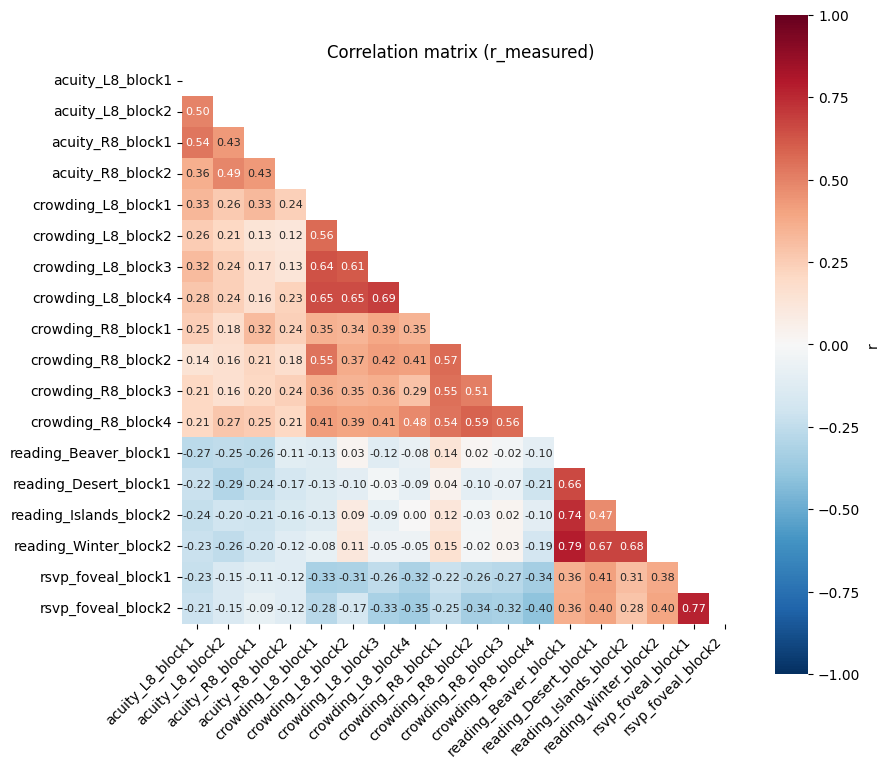

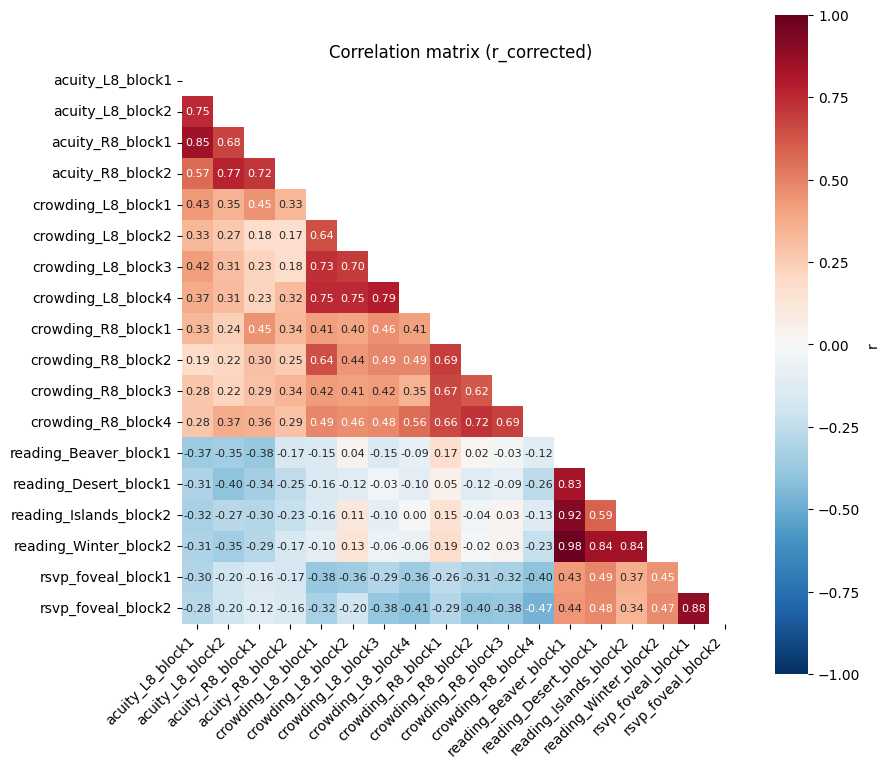

In [172]:
plot_corr_heatmap(corr_mtx_allthresh, value_col="r_measured", fontSize=8)
plot_corr_heatmap(corr_mtx_allthresh, value_col="r_corrected", fontSize=8)

### Correlations for meridians

In [173]:
all_tasks_meridian_cleaned_wide = all_tasks_meridian_cleaned_wide.set_index("prolificID")

In [174]:
var_ceiling_pairs_meridian = {
    'acuity_L8': 'acuity_L',
    'acuity_R8': 'acuity_R',
    'crowding_L8': 'crowding_L',
    'crowding_R8': 'crowding_R',
    'rsvp_foveal': 'rsvp',
    'reading_first': 'reading_firstpsg',
    'reading_second': 'reading_secondpsg'
    }

In [175]:
corr_mtx_meridian = correlation_matrix(all_tasks_meridian_cleaned_wide, all_tasks_summary_from_indThresh_meridian_truncated, var_ceiling_pairs_meridian, log10_bool=True)

acuity_L8 acuity_R8
Correlating acuity_L8 vs. acuity_R8:
  r_measured = 0.62
  r_corrected = 0.97
  Noise ceilings: acuity_L8 = 0.67, acuity_R8 = 0.60, combined = 0.63
acuity_L8 crowding_L8
Correlating acuity_L8 vs. crowding_L8:
  r_measured = 0.36
  r_corrected = 0.52
  Noise ceilings: acuity_L8 = 0.67, crowding_L8 = 0.72, combined = 0.69
acuity_L8 crowding_R8
Correlating acuity_L8 vs. crowding_R8:
  r_measured = 0.28
  r_corrected = 0.40
  Noise ceilings: acuity_L8 = 0.67, crowding_R8 = 0.72, combined = 0.69
acuity_L8 rsvp_foveal
Correlating acuity_L8 vs. rsvp_foveal:
  r_measured = -0.23
  r_corrected = -0.30
  Noise ceilings: acuity_L8 = 0.67, rsvp_foveal = 0.87, combined = 0.76
acuity_L8 reading_first
Correlating acuity_L8 vs. reading_first:
  r_measured = -0.33
  r_corrected = -0.46
  Noise ceilings: acuity_L8 = 0.67, reading_first = 0.79, combined = 0.73
acuity_L8 reading_second
Correlating acuity_L8 vs. reading_second:
  r_measured = -0.29
  r_corrected = -0.40
  Noise ceilings

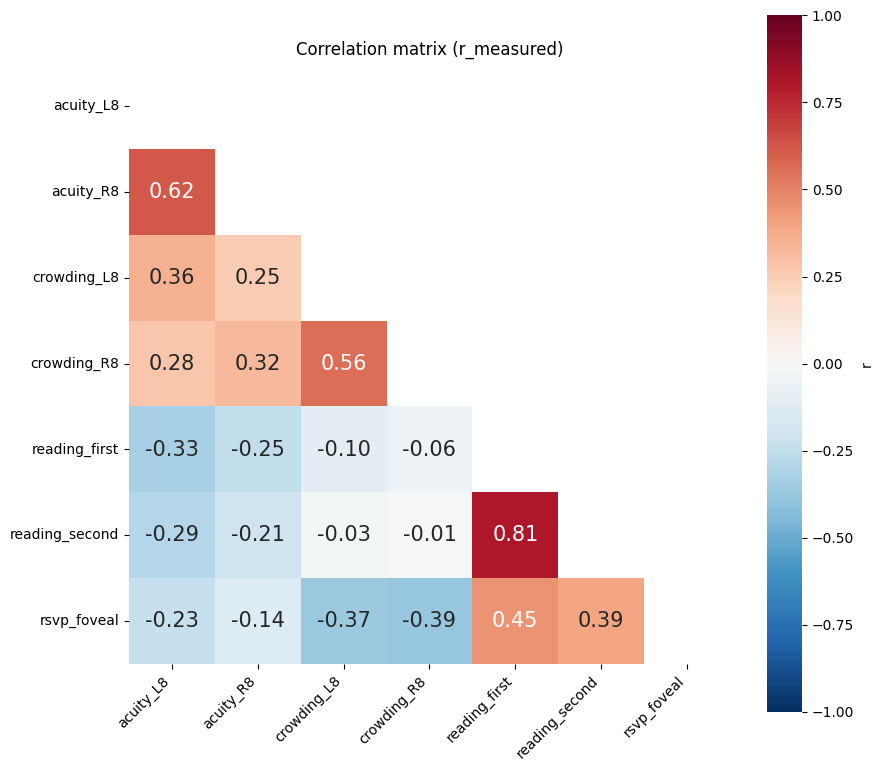

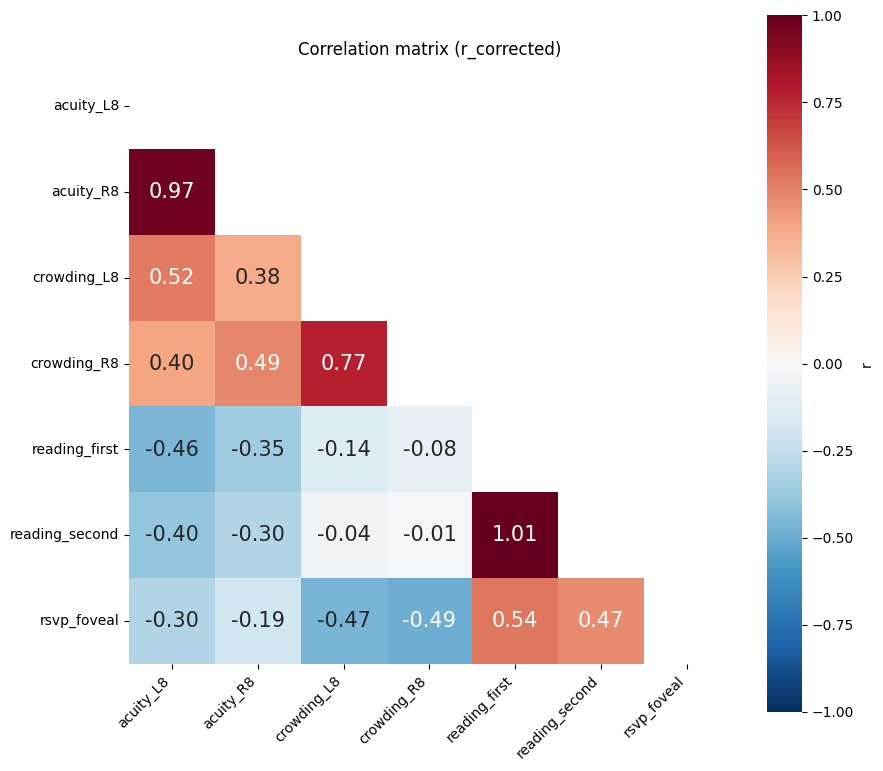

In [176]:
plot_corr_heatmap(corr_mtx_meridian, value_col="r_measured", fontSize=15)
plot_corr_heatmap(corr_mtx_meridian, value_col="r_corrected", fontSize=15)